# CDNow用户购买记录的数据分析

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
columns = ['用户ID','购买日期','订单数','订单金额']

In [4]:
data = pd.read_csv("CDNOW.txt",names = columns,sep = '\s+')

In [5]:
data.head()

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
用户ID    69659 non-null int64
购买日期    69659 non-null int64
订单数     69659 non-null int64
订单金额    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [7]:
data.describe()

,用户ID,购买日期,订单数,订单金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


# 一、商品销售静态分析

## （一）各订单——购买数量分析

In [8]:
#根据订单包含的CD数量进行分组统计
data.groupby('订单数').count().用户ID

订单数
1     31454
2     16070
3      9444
4      5015
5      2792
6      1627
7      1057
8       684
9       403
10      293
11      180
12      136
13      108
14       70
15       59
16       39
17       34
18       48
19       26
20       22
21       12
22       15
23        8
24        8
25        9
26        7
27        6
28        3
29        2
30        3
32        3
34        1
36        1
37        3
38        3
39        3
40        2
41        1
42        1
43        1
47        1
56        2
63        1
70        1
99        1
Name: 用户ID, dtype: int64

* 订单数字段表示用户该次购买行为所购买的CD数量。
* 上述统计说明，用户一次购买的CD数量的最大值为99张CD，最小值为1张。每次购买一张的购买记录最多，有31454次，每次购买的CD张数越多，相应的订单记录越少。
* 结合前述data.describe()的结果，每次订单的平均购买张数为2.41，购买张数的25百分点为1，中位数为2,75百分点为3，因此大多数购买记录的张数都比较少
* 以下绘制单次购买张数的消费记录统计图

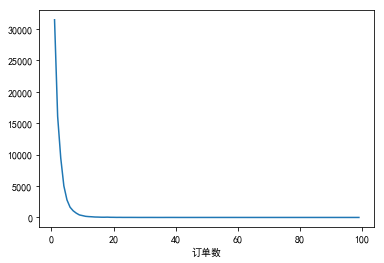

In [9]:
data.groupby('订单数').count().用户ID.plot()

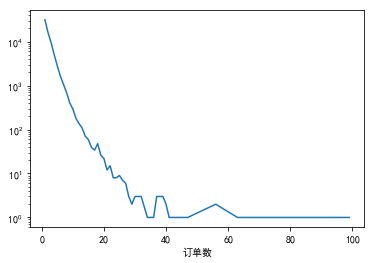

In [10]:
data.groupby('订单数').count().用户ID.plot(logy=True)
#对数图

## （二）各订单——购买金额分析

* 订单金额字段表示用户该次购买行为的金额。
* 订单金额取决于购买的CD数量及每张CD的价格

In [11]:
data[['订单金额']].sort_values(by='订单金额',ascending=False)
#获取每个订单的订单金额
#可以发现有部分0元订单

,订单金额
27632,1286.01
56479,1119.68
45314,1028.51
69416,932.23
65950,915.10
65951,831.35
45317,799.95
26686,756.47
32495,669.93
37453,606.55


In [12]:
#将订单金额截取整数部分，以便于分组
df1=data[['订单金额']].sort_values(by='订单金额',ascending=False).astype(int)

In [13]:
df1

,订单金额
27632,1286
56479,1119
45314,1028
69416,932
65950,915
65951,831
45317,799
26686,756
32495,669
37453,606


In [14]:
df1.describe()

,订单金额
count,69659.000000
mean,35.216684
std,36.335977
min,0.000000
25%,14.000000
50%,25.000000
75%,43.000000
max,1286.000000


In [15]:
#然后按照截取了整数的订单金额进行分组，并使用count函数统计每个订单金额相应的订单数
df1['订单金额'].groupby(df1.订单金额).count()

订单金额
0         80
1          2
2        112
3         64
4        228
5        431
6        511
7        230
8        414
9       1733
10       889
11      3955
12      3689
13      3333
14      5605
15      3176
16       917
17       867
18       696
19      1356
20       740
21       879
22       947
23      1253
24      1384
25      1546
26      1583
27      1599
28      1604
29      1914
        ... 
443        1
444        1
457        1
460        1
463        1
476        1
493        1
495        1
497        1
498        1
505        1
506        1
515        1
544        1
548        1
558        2
563        1
575        1
587        1
597        1
606        1
669        1
756        1
799        1
831        1
915        1
932        1
1028       1
1119       1
1286       1
Name: 订单金额, Length: 386, dtype: int64

In [16]:
#按照订单数量排序
df1['订单金额'].groupby(df1.订单金额).count().sort_values(ascending=False)

订单金额
14      5605
11      3955
12      3689
13      3333
15      3176
29      1914
9       1733
28      1604
27      1599
26      1583
25      1546
24      1384
19      1356
23      1253
30      1135
22       947
16       917
39       897
10       889
38       882
21       879
17       867
41       852
37       840
42       816
43       762
44       754
35       743
20       740
31       722
        ... 
279        1
272        1
263        1
236        1
233        1
230        1
228        1
307        1
313        1
371        1
354        1
369        1
364        1
363        1
362        1
361        1
358        1
357        1
355        1
352        1
315        1
350        1
349        1
348        1
342        1
325        1
323        1
319        1
318        1
1286       1
Name: 订单金额, Length: 386, dtype: int64

In [17]:
#链式编程的写法
#然后按照截取了整数的订单金额，统计每个订单金额相应的订单数
#data['订单金额'].groupby(data[['订单金额']].sort_values(by='订单金额',ascending=False).astype(int).订单金额).count().sort_index()

In [18]:
#然后按照截取了整数的订单金额，统计每个订单金额相应的订单数——这个统计方法好像是错误的？——不是，排序不同
#(data['订单金额'].astype(int)).groupby(data['订单金额'].astype(int)).count().sort_values(ascending=False)

* 可以发现，订单金额为11到15的占了绝大多数，这是因为：1.绝大多数用户每次只购买一张CD；2.一张CD的售价绝大部分位于11到15这个区间。  
使用如下语句计算每张CD的平均售价信息：

In [19]:
(data.订单金额/data.订单数).describe()

count    69659.000000
mean        15.459447
std          8.735528
min          0.000000
25%         12.270000
50%         13.990000
75%         15.490000
max        305.990000
dtype: float64

In [20]:
#如果不对金额取整，得到的分组过多——8209个分组
data.groupby('订单金额').count().用户ID#.describe()

订单金额
0.00        80
1.63         1
1.98         1
2.49         3
2.66         2
2.97         1
2.99       106
3.49         8
3.99        56
4.49        29
4.54         1
4.75         1
4.77         2
4.78         2
4.79       168
4.98         9
4.99        16
5.49        88
5.52         1
5.59         1
5.76         4
5.77         9
5.78       111
5.79         9
5.90         3
5.96        14
5.98        45
5.99       146
6.27         3
6.28         7
          ... 
444.19       1
457.49       1
460.85       1
463.93       1
476.01       1
493.91       1
495.39       1
497.29       1
498.48       1
505.11       1
506.97       1
515.90       1
544.83       1
548.48       1
558.09       1
558.18       1
563.59       1
575.92       1
587.63       1
597.61       1
606.55       1
669.93       1
756.47       1
799.95       1
831.35       1
915.10       1
932.23       1
1028.51      1
1119.68      1
1286.01      1
Name: 用户ID, Length: 8209, dtype: int64

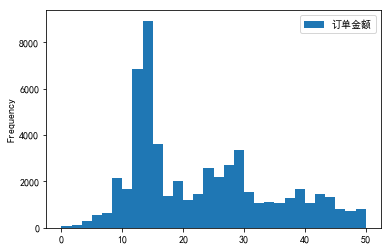

In [21]:
#选出订单金额小于50的订单（占比超过75%），并绘制订单金额的频率直方图
#可见大多数订单的订单金额位于11到15之间（对应了购买一张CD的订单）
#其次位于23到30之间也是一个峰值，对应于购买了两张CD的订单
#下一个峰值是38到45，对应于购买了三张CD的订单
data[['订单金额']].query('订单金额<50').plot.hist(bins=30)

##  *（三）订单购买数量和订单购买金额的关系分析

# 二、商品销售动态分析

## （一）订单数量趋势分析

In [22]:
df3=data[['订单数']].groupby(data.购买日期).count().sort_index()
#计算每天的下单次数
#注意分组后用的聚合函数是count，不是sum，sum算出来的是每天的售出CD总数

In [23]:
df3

,订单数
购买日期,
19970101,212
19970102,247
19970103,236
19970104,178
19970105,256
19970106,275
19970107,223
19970108,239
19970109,241


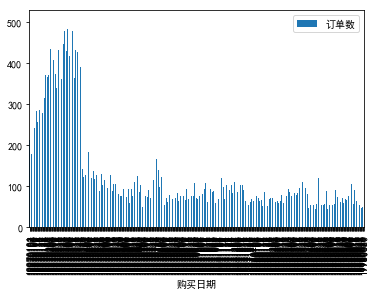

In [24]:
df3.plot.bar()
#订单数随日期的增加量

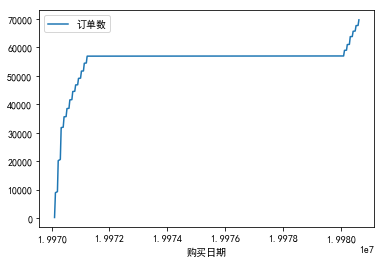

In [25]:
df3.cumsum().plot()
#订单总数的累计量

In [26]:
df3.index

Int64Index([19970101, 19970102, 19970103, 19970104, 19970105, 19970106,
            19970107, 19970108, 19970109, 19970110,
            ...
            19980621, 19980622, 19980623, 19980624, 19980625, 19980626,
            19980627, 19980628, 19980629, 19980630],
           dtype='int64', name='购买日期', length=546)

In [27]:
pd.to_datetime(df3.index,format='%Y%m%d')

DatetimeIndex(['1997-01-01', '1997-01-02', '1997-01-03', '1997-01-04',
               '1997-01-05', '1997-01-06', '1997-01-07', '1997-01-08',
               '1997-01-09', '1997-01-10',
               ...
               '1998-06-21', '1998-06-22', '1998-06-23', '1998-06-24',
               '1998-06-25', '1998-06-26', '1998-06-27', '1998-06-28',
               '1998-06-29', '1998-06-30'],
              dtype='datetime64[ns]', name='购买日期', length=546, freq=None)

In [28]:
df3.index=pd.to_datetime(df3.index,format='%Y%m%d')

In [29]:
df3

,订单数
购买日期,
1997-01-01,212
1997-01-02,247
1997-01-03,236
1997-01-04,178
1997-01-05,256
1997-01-06,275
1997-01-07,223
1997-01-08,239
1997-01-09,241


In [30]:
df3.resample('W').sum()
#以周为单位进行重采样，然后将分组内的单数相加，得到每周的下单次数

,订单数
购买日期,
1997-01-05,1129
1997-01-12,1801
1997-01-19,1963
1997-01-26,2251
1997-02-02,2510
1997-02-09,2913
1997-02-16,2610
1997-02-23,2743
1997-03-02,3114


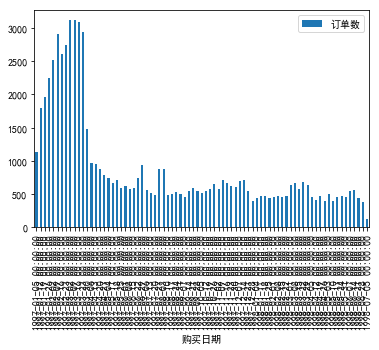

In [31]:
df3.resample('W').sum().plot.bar()

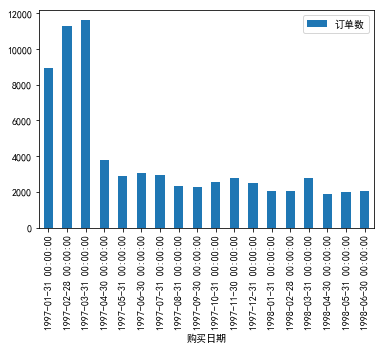

In [32]:
df3.resample('m').sum().plot.bar()

* 一般来说，逻辑斯蒂方程可以用来描述这类具有密度制约的增长模型。  
逻辑斯蒂方程 
$$\frac{1}{x}· \frac{dx}{dt}=r(1-\frac{x}{k})$$
满足初值条件$x(0)=x_0$的解为：  
$$x(t)=\frac{kx_0}{(k-x_0)e^{-rt}+x_0}$$



不妨取$k=10000,x(0)=x_0=1,r=1$ 
$$x(t)=\frac{1}{e^{-t}}$$
$$x(t)=\frac{10000}{9999e^{-t}+1}$$



In [33]:
#定义上述函数
def L(t):
    return 10000/(9999*2.71828**((-1)*t)+1)

In [34]:
L(0)

1.0

In [35]:
t1=np.arange(0.1,30,0.1)

In [36]:
t1

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11. ,
       11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. , 12.1,
       12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1, 13.2,
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15

In [37]:
x1=L(t1)

In [38]:
x1

array([1.10515922e+00, 1.22137555e+00, 1.34981131e+00, 1.49175093e+00,
       1.64861377e+00, 1.82196828e+00, 2.01354764e+00, 2.22526702e+00,
       2.45924267e+00, 2.71781300e+00, 3.00356184e+00, 3.31934412e+00,
       3.66831428e+00, 4.05395758e+00, 4.48012471e+00, 4.95106992e+00,
       5.47149322e+00, 6.04658683e+00, 6.68208654e+00, 7.38432828e+00,
       8.16031057e+00, 9.01776339e+00, 9.96522407e+00, 1.10121210e+01,
       1.21688657e+01, 1.34469546e+01, 1.48590807e+01, 1.64192569e+01,
       1.81429510e+01, 2.00472352e+01, 2.21509496e+01, 2.44748819e+01,
       2.70419652e+01, 2.98774943e+01, 3.30093632e+01, 3.64683253e+01,
       4.02882777e+01, 4.45065718e+01, 4.91643526e+01, 5.43069288e+01,
       5.99841744e+01, 6.62509656e+01, 7.31676547e+01, 8.08005818e+01,
       8.92226270e+01, 9.85138044e+01, 1.08761899e+02, 1.20063144e+02,
       1.32522947e+02, 1.46256652e+02, 1.61390338e+02, 1.78061662e+02,
       1.96420722e+02, 2.16630944e+02, 2.38869980e+02, 2.63330594e+02,
      

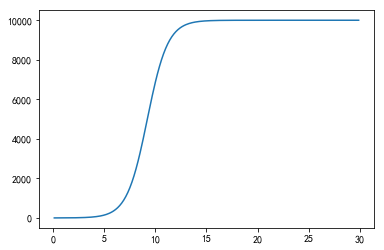

In [39]:
plt.plot(t1,x1)

* 正如上图所示，一般的销售额、客户数等的增长均符合上述逻辑斯蒂曲线，经过初始时期的缓慢增长，进入高速增长阶段，但当总量接近环境容量后，就会进入缓慢增长阶段。 
* 但与之对比，CDNnow的销售数据显示，初期的增长非常迅速，但经过初期的快速增长之后，增长速度迅速降低（下图中的拐点）。 
初期的快速增长，推测应属于营销活动的刺激。


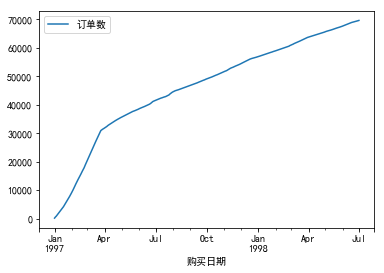

In [40]:
df3.cumsum().plot()

## （二）订单金额趋势分析

In [41]:
df4=data[['订单金额']].groupby(data.购买日期).sum().sort_index()
#计算每天的销售额（每日订单金额之和）

In [42]:
df4

,订单金额
购买日期,
19970101,7515.35
19970102,8025.95
19970103,7475.04
19970104,6722.93
19970105,9274.80
19970106,9680.55
19970107,7741.19
19970108,7963.14
19970109,7534.92


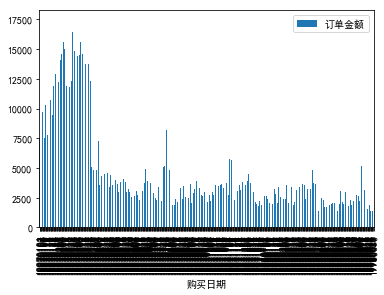

In [43]:
df4.plot.bar()


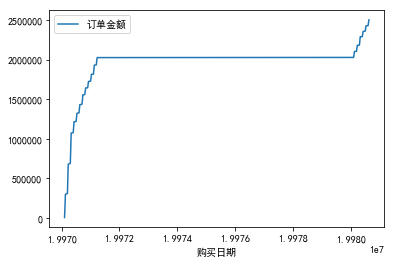

In [44]:
df4.cumsum().plot()
#销售额逐日累计

In [45]:
df4.index
#索引不是时间类型，需要做转换

Int64Index([19970101, 19970102, 19970103, 19970104, 19970105, 19970106,
            19970107, 19970108, 19970109, 19970110,
            ...
            19980621, 19980622, 19980623, 19980624, 19980625, 19980626,
            19980627, 19980628, 19980629, 19980630],
           dtype='int64', name='购买日期', length=546)

In [46]:
pd.to_datetime(df4.index,format='%Y%m%d')

DatetimeIndex(['1997-01-01', '1997-01-02', '1997-01-03', '1997-01-04',
               '1997-01-05', '1997-01-06', '1997-01-07', '1997-01-08',
               '1997-01-09', '1997-01-10',
               ...
               '1998-06-21', '1998-06-22', '1998-06-23', '1998-06-24',
               '1998-06-25', '1998-06-26', '1998-06-27', '1998-06-28',
               '1998-06-29', '1998-06-30'],
              dtype='datetime64[ns]', name='购买日期', length=546, freq=None)

In [47]:
df4.index=pd.to_datetime(df3.index,format='%Y%m%d')

In [48]:
df4

,订单金额
购买日期,
1997-01-01,7515.35
1997-01-02,8025.95
1997-01-03,7475.04
1997-01-04,6722.93
1997-01-05,9274.80
1997-01-06,9680.55
1997-01-07,7741.19
1997-01-08,7963.14
1997-01-09,7534.92


In [49]:
df4.resample('W').sum()
#以周为单位进行重采样，然后将分组内的订单金额相加，得到每周的销售额

,订单金额
购买日期,
1997-01-05,39014.07
1997-01-12,61409.65
1997-01-19,63856.66
1997-01-26,75069.10
1997-02-02,84698.98
1997-02-09,98846.32
1997-02-16,89590.60
1997-02-23,89321.13
1997-03-02,104640.05


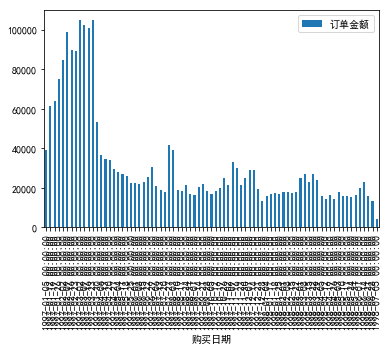

In [50]:
df4.resample('W').sum().plot.bar()

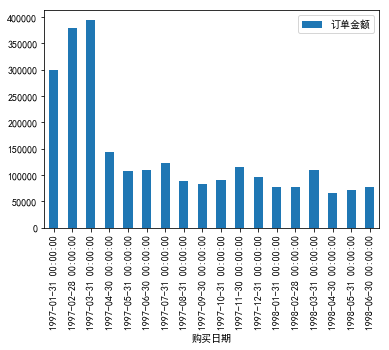

In [51]:
df4.resample('m').sum().plot.bar()

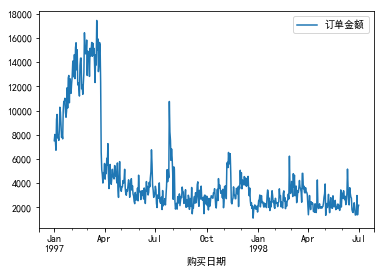

In [52]:
df4.plot()

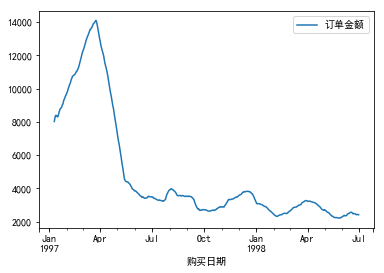

In [53]:
df4.rolling(50,min_periods=10).mean().plot()

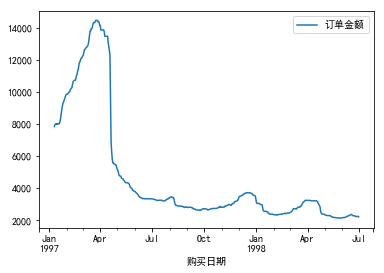

In [54]:
df4.rolling(50,min_periods=10).median().plot()

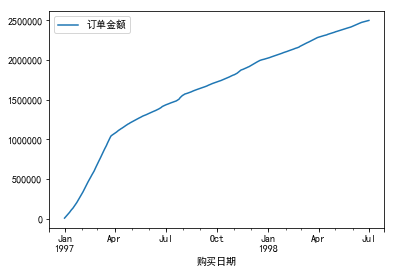

In [55]:
df4.cumsum().plot()

In [56]:
df4/df4.shift(1)-1

,订单金额
购买日期,
1997-01-01,NaN
1997-01-02,0.067941
1997-01-03,-0.068641
1997-01-04,-0.100616
1997-01-05,0.379577
1997-01-06,0.043748
1997-01-07,-0.200336
1997-01-08,0.028671
1997-01-09,-0.053775


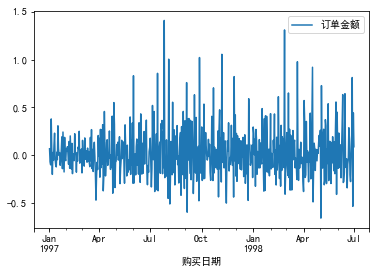

In [57]:
(df4/df4.shift(1)-1).plot()

In [58]:
df4.rolling(50,min_periods=10).mean().dropna()

,订单金额
购买日期,
1997-01-10,8028.246000
1997-01-11,8232.505455
1997-01-12,8368.643333
1997-01-13,8407.185385
1997-01-14,8362.946429
1997-01-15,8341.043333
1997-01-16,8298.684375
1997-01-17,8400.027059
1997-01-18,8530.286667


In [59]:
(df4.rolling(50,min_periods=10).mean().dropna())/((df4.rolling(50,min_periods=10).mean().dropna()).shift(1))-1

,订单金额
购买日期,
1997-01-10,NaN
1997-01-11,0.025443
1997-01-12,0.016537
1997-01-13,0.004606
1997-01-14,-0.005262
1997-01-15,-0.002619
1997-01-16,-0.005078
1997-01-17,0.012212
1997-01-18,0.015507


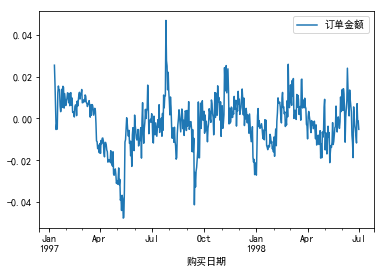

In [60]:
((df4.rolling(50,min_periods=10).mean().dropna())/((df4.rolling(50,min_periods=10).mean().dropna()).shift(1))-1).plot()

In [61]:
df4.resample('m').sum()

,订单金额
购买日期,
1997-01-31,299060.17
1997-02-28,379590.03
1997-03-31,393155.27
1997-04-30,142824.49
1997-05-31,107933.30
1997-06-30,108395.87
1997-07-31,122078.88
1997-08-31,88367.69
1997-09-30,81948.80


In [62]:
(df4.resample('m').sum())/((df4.resample('m').sum()).shift(1))-1
#每月销售额的百分比变化
#1997.04的销售额相比三月剧降63.7%，05销售额进一步比04月下降24.4%

,订单金额
购买日期,
1997-01-31,NaN
1997-02-28,0.269276
1997-03-31,0.035737
1997-04-30,-0.636722
1997-05-31,-0.244294
1997-06-30,0.004286
1997-07-31,0.126232
1997-08-31,-0.276143
1997-09-30,-0.072638


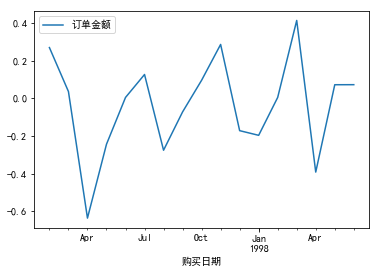

In [63]:
((df4.resample('m').sum())/((df4.resample('m').sum()).shift(1))-1).plot()
#每月销售额的百分比变化

In [64]:
(df4.resample('W').sum())/((df4.resample('W').sum()).shift(1))-1
#每周销售额的百分比变化

,订单金额
购买日期,
1997-01-05,NaN
1997-01-12,0.574039
1997-01-19,0.039847
1997-01-26,0.175588
1997-02-02,0.128280
1997-02-09,0.167031
1997-02-16,-0.093637
1997-02-23,-0.003008
1997-03-02,0.171504


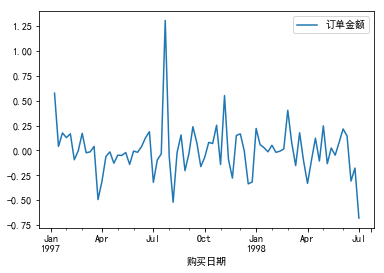

In [65]:
((df4.resample('W').sum())/((df4.resample('W').sum()).shift(1))-1).plot()

## （三）异常值检测

* 异常值一般是指正态分布中，偏离均值三个标准差以上的值

In [66]:
data[['订单数','订单金额']].describe()

,订单数,订单金额
count,69659.000000,69659.000000
mean,2.410040,35.893648
std,2.333924,36.281942
min,1.000000,0.000000
25%,1.000000,14.490000
50%,2.000000,25.980000
75%,3.000000,43.700000
max,99.000000,1286.010000


In [67]:
data['订单数'].groupby(data['订单数']).count()

订单数
1     31454
2     16070
3      9444
4      5015
5      2792
6      1627
7      1057
8       684
9       403
10      293
11      180
12      136
13      108
14       70
15       59
16       39
17       34
18       48
19       26
20       22
21       12
22       15
23        8
24        8
25        9
26        7
27        6
28        3
29        2
30        3
32        3
34        1
36        1
37        3
38        3
39        3
40        2
41        1
42        1
43        1
47        1
56        2
63        1
70        1
99        1
Name: 订单数, dtype: int64

In [68]:
data['订单数'].groupby(data['订单数']).count().cumsum()/69659
#每单的购买数量小于n的订单数量的累计百分比
#如果异常值取

订单数
1     0.451543
2     0.682238
3     0.817812
4     0.889806
5     0.929887
6     0.953244
7     0.968418
8     0.978237
9     0.984022
10    0.988228
11    0.990812
12    0.992765
13    0.994315
14    0.995320
15    0.996167
16    0.996727
17    0.997215
18    0.997904
19    0.998277
20    0.998593
21    0.998765
22    0.998981
23    0.999096
24    0.999210
25    0.999340
26    0.999440
27    0.999526
28    0.999569
29    0.999598
30    0.999641
32    0.999684
34    0.999699
36    0.999713
37    0.999756
38    0.999799
39    0.999842
40    0.999871
41    0.999885
42    0.999900
43    0.999914
47    0.999928
56    0.999957
63    0.999971
70    0.999986
99    1.000000
Name: 订单数, dtype: float64

### 1*.有部分订单的订单金额为0

In [69]:
data.订单金额.sort_values()

36410       0.00
68076       0.00
4398        0.00
2446        0.00
34746       0.00
48997       0.00
63420       0.00
17600       0.00
22941       0.00
16452       0.00
3066        0.00
46038       0.00
3849        0.00
6863        0.00
56505       0.00
12356       0.00
35199       0.00
6282        0.00
30497       0.00
1548        0.00
30536       0.00
39527       0.00
10062       0.00
8169        0.00
3943        0.00
12210       0.00
40839       0.00
51256       0.00
15002       0.00
68013       0.00
          ...   
45316     444.19
1072      457.49
25904     460.85
46129     463.93
52457     476.01
29907     493.91
52465     495.39
56281     497.29
29140     498.48
23612     505.11
45593     506.97
65949     515.90
46359     544.83
4423      548.48
4425      558.09
45319     558.18
23565     563.59
6187      575.92
31606     587.63
11428     597.61
37453     606.55
32495     669.93
26686     756.47
45317     799.95
65951     831.35
65950     915.10
69416     932.23
45314    1028.

In [70]:
data[['订单金额']].query('订单金额==0')

,订单金额
1548,0.0
2446,0.0
3066,0.0
3118,0.0
3623,0.0
3849,0.0
3943,0.0
4329,0.0
4398,0.0
5617,0.0


* 找出订单金额为0的80个订单的下单用户

In [71]:
data[data[['订单金额']].订单金额==0]

,用户ID,购买日期,订单数,订单金额
1548,455,19970102,1,0.0
2446,713,19970103,1,0.0
3066,908,19970104,1,0.0
3118,925,19970104,1,0.0
3623,1101,19970105,1,0.0
3849,1186,19970105,1,0.0
3943,1225,19970105,1,0.0
4329,1381,19970106,1,0.0
4398,1401,19970106,1,0.0
5617,1753,19970107,1,0.0


* 找出这些用户的下单记录

In [72]:
data[data[['订单金额']].订单金额==0]

,用户ID,购买日期,订单数,订单金额
1548,455,19970102,1,0.0
2446,713,19970103,1,0.0
3066,908,19970104,1,0.0
3118,925,19970104,1,0.0
3623,1101,19970105,1,0.0
3849,1186,19970105,1,0.0
3943,1225,19970105,1,0.0
4329,1381,19970106,1,0.0
4398,1401,19970106,1,0.0
5617,1753,19970107,1,0.0


In [73]:
df=data[data.用户ID.isin(data[data[['订单金额']].订单金额==0].用户ID)]

In [74]:
df

,用户ID,购买日期,订单数,订单金额
1548,455,19970102,1,0.00
2446,713,19970103,1,0.00
3066,908,19970104,1,0.00
3118,925,19970104,1,0.00
3623,1101,19970105,1,0.00
3849,1186,19970105,1,0.00
3943,1225,19970105,1,0.00
4329,1381,19970106,1,0.00
4398,1401,19970106,1,0.00
5617,1753,19970107,1,0.00


* 统计这些用户的下单次数

In [75]:
df.groupby(df.用户ID).count()['订单数'].describe()#.sort_values(ascending=False)

count    80.000000
mean      1.737500
std       2.478994
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      16.000000
Name: 订单数, dtype: float64

In [76]:
#曾经0元下单的用户，下的非0元的单
df[df.订单金额>0].count()

用户ID    59
购买日期    59
订单数     59
订单金额    59
dtype: int64

In [77]:
df.订单金额.groupby(df.用户ID).sum().sort_values(ascending=False)
#可见，曾经0元下单的用户，只有12个用户有非0元单的购买记录

用户ID
3044     324.92
11537    195.55
4738     177.78
7395     174.15
12977    171.52
17786    141.50
3858     119.74
11378     77.44
21641     27.95
10244     15.96
2703      14.37
10824     12.99
4384       0.00
4559       0.00
23157      0.00
5196       0.00
5301       0.00
5567       0.00
6001       0.00
6395       0.00
6920       0.00
7005       0.00
3875       0.00
3628       0.00
3822       0.00
1401       0.00
713        0.00
908        0.00
925        0.00
1101       0.00
          ...  
19189      0.00
19314      0.00
19384      0.00
19846      0.00
20252      0.00
21391      0.00
21690      0.00
22051      0.00
22173      0.00
22848      0.00
22950      0.00
16337      0.00
16132      0.00
15452      0.00
11940      0.00
9835       0.00
22979      0.00
10175      0.00
10664      0.00
10798      0.00
11270      0.00
11955      0.00
15258      0.00
12366      0.00
12706      0.00
13408      0.00
13434      0.00
14533      0.00
15129      0.00
455        0.00
Name: 订单金额, Length:

* 可以看到，这些曾经0元下单的用户中，绝大多数都只有这一次0元下单的购买记录，只有12个用户有非0元单的购买记录，进而可以计算出0元下单的用户的转化率为12/80=15%.
* 如果我们对0元单的出现作如下假设：0元单是由于CDNow网站的为拓展用户群而进行的0元下单的营销活动而产生的。  
那么，根据该假设，以及0元下单客户的转化率，我们可以断言，0元下单活动吸引来的用户并不是优质用户。
    * 由于没有更多信息，无法获得关于0元下单用户的更多信息。

In [78]:
#进一步根据0元单的订单日期来探索，是否是因为营销活动（营销活动一般会在集中的时间段内）
df2=(data[data[['订单金额']].订单金额==0]).groupby((data[data[['订单金额']].订单金额==0]).购买日期).count().订单数

In [79]:
df2

购买日期
19970102    1
19970103    1
19970104    2
19970105    3
19970106    2
19970107    1
19970108    2
19970109    1
19970111    2
19970112    1
19970113    1
19970115    2
19970116    2
19970118    1
19970119    2
19970121    1
19970122    1
19970124    1
19970125    1
19970127    2
19970128    1
19970130    1
19970204    1
19970205    4
19970206    1
19970208    3
19970210    2
19970212    2
19970214    1
19970215    1
19970217    2
19970221    1
19970223    1
19970224    2
19970227    2
19970304    1
19970307    2
19970308    2
19970309    2
19970311    1
19970312    1
19970316    2
19970318    1
19970319    2
19970322    1
19970323    2
19970324    1
19980310    1
19980313    4
19980314    1
19980417    1
Name: 订单数, dtype: int64

In [80]:
df2.index=df2.index.map(lambda x: str(x)[:7])

In [81]:
df2

购买日期
1997010    1
1997010    1
1997010    2
1997010    3
1997010    2
1997010    1
1997010    2
1997010    1
1997011    2
1997011    1
1997011    1
1997011    2
1997011    2
1997011    1
1997011    2
1997012    1
1997012    1
1997012    1
1997012    1
1997012    2
1997012    1
1997013    1
1997020    1
1997020    4
1997020    1
1997020    3
1997021    2
1997021    2
1997021    1
1997021    1
1997021    2
1997022    1
1997022    1
1997022    2
1997022    2
1997030    1
1997030    2
1997030    2
1997030    2
1997031    1
1997031    1
1997031    2
1997031    1
1997031    2
1997032    1
1997032    2
1997032    1
1998031    1
1998031    4
1998031    1
1998041    1
Name: 订单数, dtype: int64

In [82]:
df2.groupby(level=0).sum()
#使用索引（按照上、中、下旬）进行分组
#然后求和，得到每个时间段内的0元单数量
#看起来并不是特别集中

购买日期
1997010    13
1997011    11
1997012     7
1997013     1
1997020     9
1997021     8
1997022     6
1997030     7
1997031     7
1997032     4
1998031     6
1998041     1
Name: 订单数, dtype: int64

In [83]:
data[(data.订单金额)==0].用户ID

1548       455
2446       713
3066       908
3118       925
3623      1101
3849      1186
3943      1225
4329      1381
4398      1401
5617      1753
6282      1948
6448      1987
6863      2129
8169      2556
8594      2703
9124      2905
9658      3044
10062     3134
11657     3628
11969     3731
12210     3822
12288     3858
12356     3875
13936     4384
14596     4559
15002     4738
16452     5196
16779     5301
17600     5567
18905     6001
         ...  
37640    12366
38699    12706
39527    12977
40774    13408
40839    13434
44352    14533
46038    15129
46411    15258
47065    15452
48997    16132
49515    16337
51256    16921
53600    17772
53624    17786
56505    18861
57353    19146
57456    19189
57798    19314
58051    19384
59371    19846
60457    20252
63420    21391
64030    21641
64177    21690
65300    22051
65701    22173
67706    22848
68013    22950
68076    22979
68593    23157
Name: 用户ID, Length: 80, dtype: int64

In [84]:
np.array(data[data[['订单金额']].订单金额==0].用户ID)

array([  455,   713,   908,   925,  1101,  1186,  1225,  1381,  1401,
        1753,  1948,  1987,  2129,  2556,  2703,  2905,  3044,  3134,
        3628,  3731,  3822,  3858,  3875,  4384,  4559,  4738,  5196,
        5301,  5567,  6001,  6395,  6920,  7005,  7395,  7746,  7897,
        9697,  9710,  9835,  9853, 10175, 10244, 10664, 10798, 10824,
       11270, 11378, 11537, 11940, 11955, 12366, 12706, 12977, 13408,
       13434, 14533, 15129, 15258, 15452, 16132, 16337, 16921, 17772,
       17786, 18861, 19146, 19189, 19314, 19384, 19846, 20252, 21391,
       21641, 21690, 22051, 22173, 22848, 22950, 22979, 23157],
      dtype=int64)

# 三、用户消费行为静态分析 

## （一）各用户——购买数量分析

### 1.各用户——累计购买数量分析

In [85]:
df5=data.groupby(data['用户ID']).sum()[['订单数']]
#每个用户的总计购买数量——要求的是“累计购买数量”，cumsum
#由于每次下单并是只购买一张CD，因此分组后应该使用sum而不是count

In [86]:
df5

,订单数
用户ID,
1,1
2,6
3,16
4,7
5,29
6,1
7,18
8,18
9,6


In [87]:
df5=df5.reset_index()

In [88]:
df5

,用户ID,订单数
0,1,1
1,2,6
2,3,16
3,4,7
4,5,29
5,6,1
6,7,18
7,8,18
8,9,6
9,10,3


In [89]:
df5.sort_values(by='订单数',ascending=False)

,用户ID,订单数
14047,14048,1033
7591,7592,917
7982,7983,536
7930,7931,514
19338,19339,378
22278,22279,330
498,499,328
6568,6569,322
3048,3049,301
16516,16517,299


In [90]:
df5.groupby(df5.订单数).count()
#购买了一张CD的用户最多，有6809人
#随着购买的CD数量的增多，用户数逐渐减少

,用户ID
订单数,
1,6809
2,3933
3,2425
4,1731
5,1314
6,973
7,761
8,655
9,510


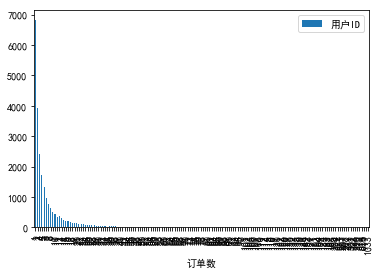

In [91]:
df5.groupby(df5.订单数).count().plot.bar()

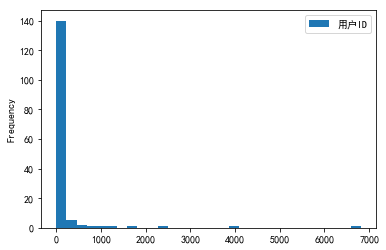

In [92]:
df5.groupby(df5.订单数).count().plot.hist(bins=30)


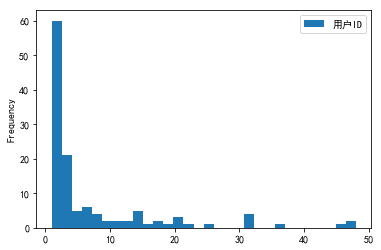

In [93]:
df5.groupby(df5.订单数).count().query('用户ID<50').plot.hist(bins=30)
#

In [94]:
##重新按照“累计购买数量”进行计算

In [95]:
data

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [96]:
data.购买日期.unique()
#首先将购买日期作为列
#然后将用户的订单数填充进去

array([19970101, 19970112, 19970102, 19970330, 19970402, 19971115,
       19971125, 19980528, 19970118, 19970802, 19971212, 19970114,
       19970204, 19970411, 19970531, 19970616, 19970722, 19970915,
       19971208, 19980103, 19971011, 19980322, 19970213, 19970617,
       19970703, 19971116, 19971225, 19980329, 19970513, 19980608,
       19970121, 19970128, 19970317, 19980220, 19970713, 19970726,
       19970910, 19970104, 19970610, 19970113, 19980120, 19970718,
       19970817, 19971024, 19980417, 19980525, 19980603, 19970126,
       19970107, 19970127, 19970308, 19970206, 19970309, 19970405,
       19970420, 19970504, 19970530, 19970906, 19971102, 19980426,
       19970214, 19980407, 19980409, 19970124, 19980311, 19970216,
       19970502, 19970514, 19970601, 19970604, 19970829, 19971002,
       19971003, 19971005, 19971013, 19971019, 19971031, 19971106,
       19971109, 19971110, 19971118, 19971123, 19980113, 19980227,
       19980305, 19980313, 19970927, 19970203, 19970129, 19970

In [97]:
df11=data.set_index(['用户ID','购买日期'])

In [98]:
df11

订单数    订单金额
用户ID  购买日期                 
1     19970101    1   11.77
2     19970112    1   12.00
      19970112    5   77.00
3     19970102    2   20.76
      19970330    2   20.76
      19970402    2   19.54
      19971115    5   57.45
      19971125    4   20.96
      19980528    1   16.99
4     19970101    2   29.33
      19970118    2   29.73
      19970802    1   14.96
      19971212    2   26.48
5     19970101    2   29.33
      19970114    1   13.97
      19970204    3   38.90
      19970411    3   45.55
      19970531    3   38.71
      19970616    2   26.14
      19970722    2   28.14
      19970915    3   40.47
      19971208    4   46.46
      19971212    3   40.47
      19980103    3   37.47
6     19970101    1   20.99
7     19970101    2   28.74
      19971011    7   97.43
      19980322    9  138.50
8     19970101    1    9.77
      19970213    1   13.97
...             ...     ...
23556 19970927    3   31.47
      19980103    2   28.98
      19980607    2   28.98
23557 19970325    1   14.37
23558 19970325    2   28.13
      19970518    3   45.51
      19970624    2   23.74
      19980225    4   48.22
23559 19970325    2   23.54
      19970518    3   35.31
      19970627    3   52.80
23560 19970325    1   18.36
23561 19970325    2   30.92
      19980128    1   15.49
      19980529    3   37.05
23562 19970325    2   29.33
23563 19970325    1   10.77
      19971004    2   47.98
23564 19970325    1   11.77
      19970521    1   11.77
      19971130    3   46.47
23565 19970325    1   11.77
23566 19970325    2   36.00
23567 19970325    1   20.97
23568 19970325    1   22.97
      19970405    4   83.74
      19970422    1   14.99
23569 19970325    2   25.74
23570 19970325    3   51.12
      19970326    2   42.96

[69659 rows x 2 columns]

In [99]:
df11[['订单数']]#.unstack()

订单数
用户ID  购买日期         
1     19970101    1
2     19970112    1
      19970112    5
3     19970102    2
      19970330    2
      19970402    2
      19971115    5
      19971125    4
      19980528    1
4     19970101    2
      19970118    2
      19970802    1
      19971212    2
5     19970101    2
      19970114    1
      19970204    3
      19970411    3
      19970531    3
      19970616    2
      19970722    2
      19970915    3
      19971208    4
      19971212    3
      19980103    3
6     19970101    1
7     19970101    2
      19971011    7
      19980322    9
8     19970101    1
      19970213    1
...             ...
23556 19970927    3
      19980103    2
      19980607    2
23557 19970325    1
23558 19970325    2
      19970518    3
      19970624    2
      19980225    4
23559 19970325    2
      19970518    3
      19970627    3
23560 19970325    1
23561 19970325    2
      19980128    1
      19980529    3
23562 19970325    2
23563 19970325    1
      19971004    2
23564 19970325    1
      19970521    1
      19971130    3
23565 19970325    1
23566 19970325    2
23567 19970325    1
23568 19970325    1
      19970405    4
      19970422    1
23569 19970325    2
23570 19970325    3
      19970326    2

[69659 rows x 1 columns]

In [100]:
df11[['订单数']].groupby(level=[0,1]).sum()

订单数
用户ID  购买日期         
1     19970101    1
2     19970112    6
3     19970102    2
      19970330    2
      19970402    2
      19971115    5
      19971125    4
      19980528    1
4     19970101    2
      19970118    2
      19970802    1
      19971212    2
5     19970101    2
      19970114    1
      19970204    3
      19970411    3
      19970531    3
      19970616    2
      19970722    2
      19970915    3
      19971208    4
      19971212    3
      19980103    3
6     19970101    1
7     19970101    2
      19971011    7
      19980322    9
8     19970101    1
      19970213    1
      19970617    3
...             ...
23556 19970927    3
      19980103    2
      19980607    2
23557 19970325    1
23558 19970325    2
      19970518    3
      19970624    2
      19980225    4
23559 19970325    2
      19970518    3
      19970627    3
23560 19970325    1
23561 19970325    2
      19980128    1
      19980529    3
23562 19970325    2
23563 19970325    1
      19971004    2
23564 19970325    1
      19970521    1
      19971130    3
23565 19970325    1
23566 19970325    2
23567 19970325    1
23568 19970325    1
      19970405    4
      19970422    1
23569 19970325    2
23570 19970325    3
      19970326    2

[67591 rows x 1 columns]

In [101]:
df11[['订单数']].groupby(level=[0,1]).sum().unstack()

订单数                                                                 \
购买日期  19970101 19970102 19970103 19970104 19970105 19970106 19970107 19970108   
用户ID                                                                            
1          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2          NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3          NaN      2.0      NaN      NaN      NaN      NaN      NaN      NaN   
4          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9          2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12         4.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
13         4.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14         2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
15         4.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
17         5.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
18         NaN      NaN      NaN      1.0      NaN      NaN      NaN      NaN   
19        10.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20        27.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
21         3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
22         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23         2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
24         3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
25         2.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
26         3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
27         NaN      NaN      NaN      NaN      NaN      NaN      6.0      NaN   
28         3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
29         3.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
30         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...        ...      ...      ...      ...      ...      ...      ...      ...   
23541      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23542      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23543      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23544      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23545      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23546      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23547      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23548      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23549      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23550      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23551      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23552      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23553      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23554      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23555      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23556      NaN      NaN      NaN      NaN 

In [102]:
df11[['订单数']].groupby(level=[0,1]).sum().unstack().T.cumsum().ffill().T.fillna(0)
#各用户的累计购买数量（是购买的CN总张数，不是下的订单数量）
#列索引表示日期，行索引表示用户ID
#表格内容为每个用户在相应的日期的累计购买数量
#如果在相应的日期尚未购买，则为0（原本是缺失值，使用0进行填充后更易于理解）
#

订单数                                                                 \
购买日期  19970101 19970102 19970103 19970104 19970105 19970106 19970107 19970108   
用户ID                                                                            
1          1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
2          0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3          0.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
4          2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
5          2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
6          1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
7          2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
8          1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
9          2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
10         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
11         1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
12         4.0      4.0      4.0      4.0      4.0      4.0      4.0      4.0   
13         4.0      4.0      4.0      4.0      4.0      4.0      4.0      4.0   
14         2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
15         4.0      4.0      4.0      4.0      4.0      4.0      4.0      4.0   
16         1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
17         5.0      5.0      5.0      5.0      5.0      5.0      5.0      5.0   
18         0.0      0.0      0.0      1.0      1.0      1.0      1.0      1.0   
19        10.0     10.0     10.0     10.0     10.0     10.0     10.0     10.0   
20        27.0     27.0     27.0     27.0     27.0     27.0     27.0     27.0   
21         3.0      3.0      3.0      3.0      3.0      3.0      3.0      3.0   
22         1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
23         2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
24         3.0      3.0      3.0      3.0      3.0      3.0      3.0      3.0   
25         2.0      2.0      2.0      2.0      2.0      2.0      2.0      2.0   
26         3.0      3.0      3.0      3.0      3.0      3.0      3.0      3.0   
27         0.0      0.0      0.0      0.0      0.0      0.0      6.0      6.0   
28         3.0      3.0      3.0      3.0      3.0      3.0      3.0      3.0   
29         3.0      3.0      3.0      3.0      3.0      3.0      3.0      3.0   
30         1.0      1.0      1.0      1.0      1.0      1.0      1.0      1.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
23541      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23542      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23543      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23544      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23545      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23546      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23547      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23548      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23549      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23550      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23551      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23552      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23553      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23554      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23555      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
23556      0.0      0.0      0.0      0.0 

### 2.各用户——购买数量累计贡献分析

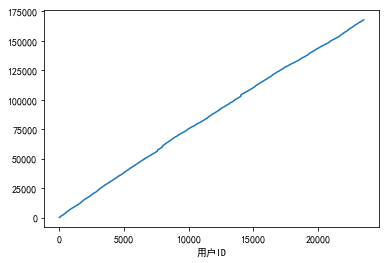

In [103]:
###这个做法也有问题？？
###应该是在上一小节的累计购买数量的基础上，计算购买数量的累计贡献？？？？？
data.groupby('用户ID').sum()['订单数'].cumsum().plot()
#按照用户ID的先后顺序，计算用户购买数量的累计贡献
#不一定合理，因为ID在前的，购买时间不一定在前
#应该按照首次购买时间的先后顺序，计算各用户的购买数量累计贡献

In [104]:
data.groupby('用户ID').sum()#[['购买日期','订单数']]
#有问题，购买日期也被求和了

,购买日期,订单数,订单金额
用户ID,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61
6,19970101,1,20.99
7,59921434,18,264.67
8,159775420,18,197.66
9,59921222,6,95.85


In [105]:
data.groupby('用户ID').apply(sum)
#效果与上述一直，也有问题
#能否对不同的列apply不同的函数？

,用户ID,购买日期,订单数,订单金额
用户ID,,,,
1,1.0,19970101.0,1.0,11.77
2,4.0,39940224.0,6.0,89.00
3,18.0,119833602.0,16.0,156.46
4,16.0,79882233.0,7.0,100.50
5,55.0,219686137.0,29.0,385.61
6,6.0,19970101.0,1.0,20.99
7,21.0,59921434.0,18.0,264.67
8,64.0,159775420.0,18.0,197.66
9,27.0,59921222.0,6.0,95.85


In [106]:
#data.groupby('用户ID').apply({'订单数':sum,'购买日期':min})
#语法错误

In [107]:
#data.apply??

In [108]:
df9=data.set_index(['用户ID'])

In [109]:
df9

,购买日期,订单数,订单金额
用户ID,,,
1,19970101,1,11.77
2,19970112,1,12.00
2,19970112,5,77.00
3,19970102,2,20.76
3,19970330,2,20.76
3,19970402,2,19.54
3,19971115,5,57.45
3,19971125,4,20.96
3,19980528,1,16.99


In [110]:
df9.groupby(level='用户ID').sum()['订单数']
#各用户的总计订单数

用户ID
1         1
2         6
3        16
4         7
5        29
6         1
7        18
8        18
9         6
10        3
11        4
12        4
13        4
14        2
15        4
16        8
17        5
18        1
19       11
20       46
21        4
22        1
23        2
24        4
25       12
26        6
27       10
28        7
29       28
30        2
         ..
23541     2
23542     5
23543     2
23544    12
23545     1
23546     1
23547     2
23548     2
23549     2
23550     2
23551    12
23552     4
23553     8
23554     3
23555    14
23556    15
23557     1
23558    11
23559     8
23560     1
23561     6
23562     2
23563     3
23564     5
23565     1
23566     2
23567     1
23568     6
23569     2
23570     5
Name: 订单数, Length: 23570, dtype: int64

In [111]:
df9.groupby(level='用户ID').min()['购买日期']
#各用户的第一次购买日期

用户ID
1        19970101
2        19970112
3        19970102
4        19970101
5        19970101
6        19970101
7        19970101
8        19970101
9        19970101
10       19970121
11       19970101
12       19970101
13       19970101
14       19970101
15       19970101
16       19970101
17       19970101
18       19970104
19       19970101
20       19970101
21       19970101
22       19970101
23       19970101
24       19970101
25       19970101
26       19970101
27       19970107
28       19970101
29       19970101
30       19970101
           ...   
23541    19970325
23542    19970325
23543    19970325
23544    19970325
23545    19970325
23546    19970325
23547    19970325
23548    19970325
23549    19970325
23550    19970325
23551    19970325
23552    19970325
23553    19970325
23554    19970325
23555    19970325
23556    19970325
23557    19970325
23558    19970325
23559    19970325
23560    19970325
23561    19970325
23562    19970325
23563    19970325
23564    19970325
23565

In [112]:
#将上述两个Series合并为一个DF
df10=pd.concat([df9.groupby(level='用户ID').min()['购买日期'],df9.groupby(level='用户ID').sum()['订单数']],axis=1)

In [113]:
df10

,购买日期,订单数
用户ID,,
1,19970101,1
2,19970112,6
3,19970102,16
4,19970101,7
5,19970101,29
6,19970101,1
7,19970101,18
8,19970101,18
9,19970101,6


In [114]:
df10=df10.sort_values(by='购买日期')
#根据购买日期排序

In [115]:
df10

,购买日期,订单数
用户ID,,
1,19970101,1
150,19970101,1
151,19970101,1
152,19970101,17
153,19970101,1
154,19970101,5
155,19970101,1
156,19970101,1
157,19970101,6


In [116]:
df10.reset_index().set_index('购买日期')[['订单数']].groupby(level=0).sum().cumsum()
#先按ID，再按日期分组
#二次分组后，只有84行了。
#不合理

,订单数
购买日期,
19970101,1612
19970102,3772
19970103,5574
19970104,6735
19970105,8490
19970106,9989
19970107,12073
19970108,13936
19970109,15341


In [117]:
#
data.groupby(['购买日期','用户ID']).sum()

订单数    订单金额
购买日期     用户ID              
19970101 1        1   11.77
         4        2   29.33
         5        2   29.33
         6        1   20.99
         7        2   28.74
         8        1    9.77
         9        2   23.54
         11       1   13.49
         12       4   57.06
         13       4   72.94
         14       2   29.92
         15       4   52.87
         16       1    9.77
         17       5   73.22
         19      10  163.35
         20      27  363.60
         21       3   63.34
         22       1   14.37
         23       2   24.74
         24       3   47.28
         25       2   24.96
         26       3   42.72
         28       3   39.51
         29       3   46.72
         30       1   14.37
         31       4   59.06
         32       3   49.97
         33       3   41.69
         34       2   23.14
         35       2   26.73
...             ...     ...
19980630 9359     1   18.49
         10038    1    9.99
         10370    7   90.43
         11515    4   47.46
         11669    3   38.97
         11809    2   26.57
         14048    9   85.91
         14068    2   18.48
         14625    5   64.45
         15278    3   39.45
         15786    5   68.54
         16467    4   65.46
         17027    4   56.46
         17552    1   15.49
         17786    2   27.98
         18826    3   42.47
         18912    3   40.36
         19242    1   11.49
         19329    2   25.98
         19824    3   43.56
         19861    1   14.99
         20062    1   11.49
         20250    3   38.74
         20815    4   53.46
         21069    1   11.49
         22019    7   98.93
         22613    1   11.49
         22815    1    9.49
         22924    3   41.47
         23149    2   30.48

[67591 rows x 2 columns]

In [118]:
data.groupby(['购买日期','用户ID']).sum()['订单数'].cumsum()

购买日期      用户ID 
19970101  1             1
          4             3
          5             5
          6             6
          7             8
          8             9
          9            11
          11           12
          12           16
          13           20
          14           22
          15           26
          16           27
          17           32
          19           42
          20           69
          21           72
          22           73
          23           75
          24           78
          25           80
          26           83
          28           86
          29           89
          30           90
          31           94
          32           97
          33          100
          34          102
          35          104
                    ...  
19980630  9359     167793
          10038    167794
          10370    167801
          11515    167805
          11669    167808
          11809    167810
          14048    167

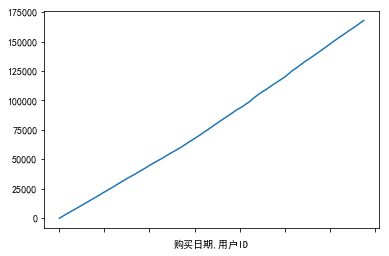

In [119]:
data.groupby(['购买日期','用户ID']).sum()['订单数'].cumsum().plot()
#和最开始的图并没有什么区别
#不符合所谓的“二八原则”

### 3.各用户——最大单笔购买数量分析

In [120]:
data

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [121]:
data.groupby(data.用户ID).idxmax()
#按用户分组，然后获取每个分组（也就是每个用户）的各列取得最大值的索引

,订单数,订单金额,购买日期
用户ID,,,
1,0,0,0
2,2,2,1
3,6,6,8
4,9,10,12
5,21,21,23
6,24,24,24
7,27,27,27
8,33,33,35
9,36,38,38


In [122]:
#df.idxmax??

In [123]:
data.groupby(data.用户ID).idxmax().订单数
#由于要获取每个用户的最大订单数，只提取每个用户的订单数的最大值的索引
#执行较慢，可以定义一个中间变量

用户ID
1            0
2            2
3            6
4            9
5           21
6           24
7           27
8           33
9           36
10          39
11          40
12          44
13          45
14          46
15          47
16          50
17          52
18          53
19          54
20          56
21          58
22          60
23          61
24          62
25          70
26          72
27          74
28          76
29          90
30          91
         ...  
23541    69594
23542    69596
23543    69597
23544    69598
23545    69601
23546    69602
23547    69603
23548    69605
23549    69606
23550    69607
23551    69610
23552    69614
23553    69616
23554    69619
23555    69623
23556    69628
23557    69632
23558    69636
23559    69638
23560    69640
23561    69643
23562    69644
23563    69646
23564    69649
23565    69650
23566    69651
23567    69652
23568    69654
23569    69656
23570    69657
Name: 订单数, Length: 23570, dtype: int64

In [124]:
list(np.array(data.groupby(data.用户ID).idxmax().订单数))
#将索引转换为list，以便于用索引获取data中相应的行

[0,
 2,
 6,
 9,
 21,
 24,
 27,
 33,
 36,
 39,
 40,
 44,
 45,
 46,
 47,
 50,
 52,
 53,
 54,
 56,
 58,
 60,
 61,
 62,
 70,
 72,
 74,
 76,
 90,
 91,
 93,
 97,
 102,
 125,
 126,
 128,
 134,
 136,
 138,
 151,
 156,
 157,
 159,
 164,
 167,
 169,
 175,
 196,
 216,
 217,
 219,
 230,
 232,
 238,
 239,
 244,
 245,
 246,
 247,
 250,
 251,
 252,
 263,
 274,
 281,
 283,
 284,
 287,
 289,
 290,
 291,
 292,
 295,
 296,
 297,
 298,
 299,
 301,
 302,
 303,
 312,
 318,
 325,
 328,
 329,
 330,
 331,
 336,
 343,
 355,
 357,
 358,
 360,
 362,
 385,
 401,
 411,
 415,
 420,
 426,
 427,
 431,
 432,
 435,
 436,
 442,
 443,
 444,
 446,
 447,
 450,
 464,
 466,
 470,
 474,
 475,
 476,
 480,
 481,
 482,
 487,
 488,
 489,
 490,
 495,
 502,
 503,
 504,
 508,
 511,
 517,
 519,
 528,
 531,
 534,
 536,
 538,
 539,
 540,
 541,
 544,
 551,
 555,
 557,
 564,
 581,
 588,
 594,
 597,
 599,
 600,
 601,
 607,
 608,
 613,
 614,
 616,
 617,
 618,
 619,
 629,
 631,
 632,
 634,
 642,
 646,
 652,
 660,
 661,
 663,
 664,
 665,
 667

In [125]:
data.iloc[list(np.array(data.groupby(data.用户ID).idxmax().订单数))]
#获取每个用户下的最大订单的购买记录

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
2,2,19970112,5,77.00
6,3,19971115,5,57.45
9,4,19970101,2,29.33
21,5,19971208,4,46.46
24,6,19970101,1,20.99
27,7,19980322,9,138.50
33,8,19971116,7,50.43
36,9,19970101,2,23.54
39,10,19970121,3,39.31


In [126]:
data.iloc[list(np.array(data.groupby(data.用户ID).idxmax().订单数))].订单数.value_counts()
#将每个用户的最大订单的购买CD数量，按照数量进行分组，然后统计相应的用户数
#可见，很多用户的最大订单都是1
#最大订单的购买数量越多，则相应的用户数越少

1     8979
2     5286
3     3417
4     2119
5     1221
6      801
7      504
8      348
9      224
10     168
11      97
12      86
13      70
14      42
15      33
18      32
17      23
16      19
19      15
20      11
22      11
21      10
24       6
26       6
23       6
25       6
27       5
30       3
37       3
32       3
29       2
39       2
38       2
28       1
43       1
56       1
99       1
42       1
40       1
41       1
70       1
47       1
63       1
Name: 订单数, dtype: int64

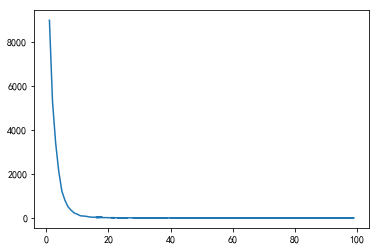

In [127]:
data.iloc[list(np.array(data.groupby(data.用户ID).idxmax().订单数))].订单数.value_counts().plot()


## （二）各用户——购买金额分析

### 1.各用户——累计购买金额分析

In [128]:
#类似于累计购买数量分析的方法

In [129]:
df11

订单数    订单金额
用户ID  购买日期                 
1     19970101    1   11.77
2     19970112    1   12.00
      19970112    5   77.00
3     19970102    2   20.76
      19970330    2   20.76
      19970402    2   19.54
      19971115    5   57.45
      19971125    4   20.96
      19980528    1   16.99
4     19970101    2   29.33
      19970118    2   29.73
      19970802    1   14.96
      19971212    2   26.48
5     19970101    2   29.33
      19970114    1   13.97
      19970204    3   38.90
      19970411    3   45.55
      19970531    3   38.71
      19970616    2   26.14
      19970722    2   28.14
      19970915    3   40.47
      19971208    4   46.46
      19971212    3   40.47
      19980103    3   37.47
6     19970101    1   20.99
7     19970101    2   28.74
      19971011    7   97.43
      19980322    9  138.50
8     19970101    1    9.77
      19970213    1   13.97
...             ...     ...
23556 19970927    3   31.47
      19980103    2   28.98
      19980607    2   28.98
23557 19970325    1   14.37
23558 19970325    2   28.13
      19970518    3   45.51
      19970624    2   23.74
      19980225    4   48.22
23559 19970325    2   23.54
      19970518    3   35.31
      19970627    3   52.80
23560 19970325    1   18.36
23561 19970325    2   30.92
      19980128    1   15.49
      19980529    3   37.05
23562 19970325    2   29.33
23563 19970325    1   10.77
      19971004    2   47.98
23564 19970325    1   11.77
      19970521    1   11.77
      19971130    3   46.47
23565 19970325    1   11.77
23566 19970325    2   36.00
23567 19970325    1   20.97
23568 19970325    1   22.97
      19970405    4   83.74
      19970422    1   14.99
23569 19970325    2   25.74
23570 19970325    3   51.12
      19970326    2   42.96

[69659 rows x 2 columns]

In [130]:
df11[['订单金额']].groupby(level=[0,1]).sum().unstack().T.cumsum().ffill().T.fillna(0)


订单金额                                                                 \
购买日期  19970101 19970102 19970103 19970104 19970105 19970106 19970107 19970108   
用户ID                                                                            
1        11.77    11.77    11.77    11.77    11.77    11.77    11.77    11.77   
2         0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
3         0.00    20.76    20.76    20.76    20.76    20.76    20.76    20.76   
4        29.33    29.33    29.33    29.33    29.33    29.33    29.33    29.33   
5        29.33    29.33    29.33    29.33    29.33    29.33    29.33    29.33   
6        20.99    20.99    20.99    20.99    20.99    20.99    20.99    20.99   
7        28.74    28.74    28.74    28.74    28.74    28.74    28.74    28.74   
8         9.77     9.77     9.77     9.77     9.77     9.77     9.77     9.77   
9        23.54    23.54    23.54    23.54    23.54    23.54    23.54    23.54   
10        0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
11       13.49    13.49    13.49    13.49    13.49    13.49    13.49    13.49   
12       57.06    57.06    57.06    57.06    57.06    57.06    57.06    57.06   
13       72.94    72.94    72.94    72.94    72.94    72.94    72.94    72.94   
14       29.92    29.92    29.92    29.92    29.92    29.92    29.92    29.92   
15       52.87    52.87    52.87    52.87    52.87    52.87    52.87    52.87   
16        9.77     9.77     9.77     9.77     9.77     9.77     9.77     9.77   
17       73.22    73.22    73.22    73.22    73.22    73.22    73.22    73.22   
18        0.00     0.00     0.00    14.96    14.96    14.96    14.96    14.96   
19      163.35   163.35   163.35   163.35   163.35   163.35   163.35   163.35   
20      363.60   363.60   363.60   363.60   363.60   363.60   363.60   363.60   
21       63.34    63.34    63.34    63.34    63.34    63.34    63.34    63.34   
22       14.37    14.37    14.37    14.37    14.37    14.37    14.37    14.37   
23       24.74    24.74    24.74    24.74    24.74    24.74    24.74    24.74   
24       47.28    47.28    47.28    47.28    47.28    47.28    47.28    47.28   
25       24.96    24.96    24.96    24.96    24.96    24.96    24.96    24.96   
26       42.72    42.72    42.72    42.72    42.72    42.72    42.72    42.72   
27        0.00     0.00     0.00     0.00     0.00     0.00    83.41    83.41   
28       39.51    39.51    39.51    39.51    39.51    39.51    39.51    39.51   
29       46.72    46.72    46.72    46.72    46.72    46.72    46.72    46.72   
30       14.37    14.37    14.37    14.37    14.37    14.37    14.37    14.37   
...        ...      ...      ...      ...      ...      ...      ...      ...   
23541     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23542     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23543     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23544     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23545     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23546     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23547     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23548     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23549     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23550     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23551     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23552     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23553     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23554     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23555     0.00     0.00     0.00     0.00     0.00     0.00     0.00     0.00   
23556     0.00     0.00     0.00     0.00

###  2.各用户——购买金额累计贡献分析

In [131]:
#做法和3.1.2的 各用户购买数量累计贡献分析 的方法一致，只需要替换列名 订单数 为 订单金额
#等研究出正确的做法后再做

### 3.各用户——最大单笔消费金额分析

In [132]:
#方法与3.1.3的方法一致，只需要替换列名
#首先获取订单金额最大时的索引值，然后依据索引提取各用户最大单笔消费金额所对应的购买记录
df12=data.iloc[list(np.array(data.groupby(data.用户ID).idxmax().订单金额))]
#该步骤的计算耗时稍长，因此赋予一个中间变量，以在后续步骤中节省时间

In [133]:
df12

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
2,2,19970112,5,77.00
6,3,19971115,5,57.45
10,4,19970118,2,29.73
21,5,19971208,4,46.46
24,6,19970101,1,20.99
27,7,19980322,9,138.50
33,8,19971116,7,50.43
38,9,19980608,2,41.98
39,10,19970121,3,39.31


In [134]:
df12.订单金额.astype(int).value_counts()
#在上述结果的基础上，获取每个用户的最大单笔消费金额的订单金额，亲取整数，然后统计每个订单金额对应的用户数
#结果有357行，可以进一步使用pd.cut进行面元划分后，再统计

14      1685
15      1106
11       927
13       866
12       722
29       709
28       512
27       509
19       482
26       467
24       423
30       402
25       401
23       386
9        376
16       339
39       320
17       318
42       310
38       299
44       299
37       295
41       293
31       290
43       285
35       266
21       265
20       238
10       238
40       236
        ... 
323        1
339        1
371        1
563        1
915        1
382        1
350        1
318        1
180        1
260        1
292        1
308        1
436        1
756        1
932        1
1028       1
270        1
325        1
597        1
230        1
294        1
342        1
358        1
390        1
1286       1
263        1
311        1
327        1
343        1
1119       1
Name: 订单金额, Length: 357, dtype: int64

In [135]:
df12.订单金额.sort_values()

12210       0.00
46038       0.00
32803       0.00
63420       0.00
16779       0.00
60457       0.00
10062       0.00
33123       0.00
58051       0.00
16452       0.00
51256       0.00
3066        0.00
40774       0.00
3118        0.00
36446       0.00
36410       0.00
34436       0.00
57456       0.00
47065       0.00
65701       0.00
3849        0.00
46411       0.00
4329        0.00
6863        0.00
68013       0.00
57798       0.00
3943        0.00
40839       0.00
48997       0.00
1548        0.00
          ...   
28579     409.22
63436     410.54
14022     421.30
48462     421.73
67607     428.30
21670     432.76
29153     436.91
32641     440.45
1072      457.49
25904     460.85
46129     463.93
29907     493.91
52465     495.39
56281     497.29
29140     498.48
45593     506.97
46359     544.83
4425      558.09
23565     563.59
6187      575.92
31606     587.63
11428     597.61
37453     606.55
32495     669.93
26686     756.47
65950     915.10
69416     932.23
45314    1028.

In [136]:
pd.cut(df12.订单金额,200).value_counts().sort_index()

(-1.286, 6.43]           237
(6.43, 12.86]           2299
(12.86, 19.29]          4766
(19.29, 25.72]          2165
(25.72, 32.15]          3146
(32.15, 38.58]          1531
(38.58, 45.01]          1913
(45.01, 51.44]          1138
(51.44, 57.87]          1059
(57.87, 64.3]            911
(64.3, 70.731]           728
(70.731, 77.161]         585
(77.161, 83.591]         433
(83.591, 90.021]         411
(90.021, 96.451]         288
(96.451, 102.881]        259
(102.881, 109.311]       226
(109.311, 115.741]       178
(115.741, 122.171]       169
(122.171, 128.601]       141
(128.601, 135.031]       117
(135.031, 141.461]        97
(141.461, 147.891]        79
(147.891, 154.321]        66
(154.321, 160.751]        61
(160.751, 167.181]        74
(167.181, 173.611]        37
(173.611, 180.041]        51
(180.041, 186.471]        34
(186.471, 192.902]        27
                        ... 
(1093.108, 1099.539]       0
(1099.539, 1105.969]       0
(1105.969, 1112.399]       0
(1112.399, 111

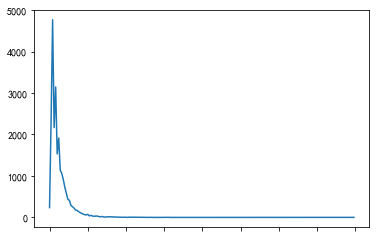

In [137]:
pd.cut(df12.订单金额,200).value_counts().sort_index().plot()


## （三）各用户购买次数分析

In [138]:
df6=data.groupby(data['用户ID']).count()[['订单数']]
#各用户下单次数统计
#是下单次数，不是总计购买数量，因此使用count而不是sum

In [139]:
df6

,订单数
用户ID,
1,1
2,2
3,6
4,4
5,11
6,1
7,3
8,8
9,3


In [140]:
df6=df6.reset_index()

In [141]:
df6

,用户ID,订单数
0,1,1
1,2,2
2,3,6
3,4,4
4,5,11
5,6,1
6,7,3
7,8,8
8,9,3
9,10,1


In [142]:
df6.groupby(df6.订单数).count()
#下单一次的用户最多，有11908人
#随着下单次数的增多，用户数逐渐减少

,用户ID,订单数
订单数,,
1,11908,11908
2,4079,4079
3,2217,2217
4,1441,1441
5,995,995
6,635,635
7,475,475
8,392,392
9,274,274


In [143]:
df6.describe()


,用户ID,订单数
count,23570.000000,23570.000000
mean,11785.500000,2.955409
std,6804.217258,4.736558
min,1.000000,1.000000
25%,5893.250000,1.000000
50%,11785.500000,1.000000
75%,17677.750000,3.000000
max,23570.000000,217.000000


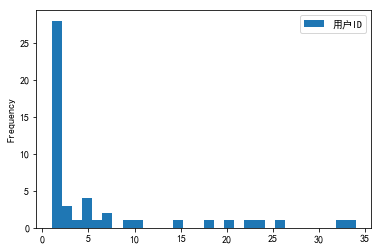

In [144]:
df6.groupby(df6.订单数).count().query('用户ID<50').plot.hist(bins=30)
#下单次数少于50次的用户数量分布图
#可以看到，23570个用户当中，约50%的用户（11980）都只有一次下单记录，多次下单的用户相对较少

# 四、用户消费行为动态分析

## （一）各用户——第一次购买时间分析

In [145]:
df9.groupby(level='用户ID').min()['购买日期']
#各用户的第一次购买日期

用户ID
1        19970101
2        19970112
3        19970102
4        19970101
5        19970101
6        19970101
7        19970101
8        19970101
9        19970101
10       19970121
11       19970101
12       19970101
13       19970101
14       19970101
15       19970101
16       19970101
17       19970101
18       19970104
19       19970101
20       19970101
21       19970101
22       19970101
23       19970101
24       19970101
25       19970101
26       19970101
27       19970107
28       19970101
29       19970101
30       19970101
           ...   
23541    19970325
23542    19970325
23543    19970325
23544    19970325
23545    19970325
23546    19970325
23547    19970325
23548    19970325
23549    19970325
23550    19970325
23551    19970325
23552    19970325
23553    19970325
23554    19970325
23555    19970325
23556    19970325
23557    19970325
23558    19970325
23559    19970325
23560    19970325
23561    19970325
23562    19970325
23563    19970325
23564    19970325
23565

In [146]:
(df9.groupby(level='用户ID').min()['购买日期']).max()
#可以看到，自1997.03.25后就没有新增用户，只有老用户重复购买了
#

19970325

In [147]:
#按时间分组计数，然后累计求和
#得到用户数随时间增长情况
df23=df9.groupby(level='用户ID').min().groupby('购买日期').count().cumsum()[['订单数']]

In [148]:
df23

,订单数
购买日期,
19970101,209
19970102,450
19970103,678
19970104,852
19970105,1102
19970106,1363
19970107,1574
19970108,1787
19970109,2006


In [149]:
df23.index=pd.to_datetime(df23.index,format='%Y%m%d')

In [150]:
df23

,订单数
购买日期,
1997-01-01,209
1997-01-02,450
1997-01-03,678
1997-01-04,852
1997-01-05,1102
1997-01-06,1363
1997-01-07,1574
1997-01-08,1787
1997-01-09,2006


In [151]:
#df23.resample('d',)

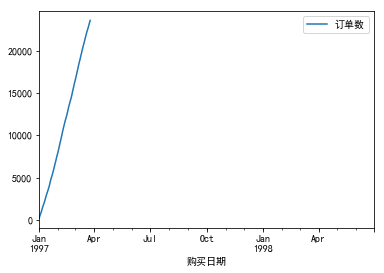

In [152]:
df23.plot(xlim=['1997-01-01','1998-06-30'])
#总用户数随时间增长的图示

In [153]:
#df23.plot??

## （二）各用户——最后一次购买时间分析

In [154]:
df9.groupby(level='用户ID').max()['购买日期']
#各用户的最后一次购买日期

用户ID
1        19970101
2        19970112
3        19980528
4        19971212
5        19980103
6        19970101
7        19980322
8        19980329
9        19980608
10       19970121
11       19980220
12       19970101
13       19970101
14       19970101
15       19970101
16       19970910
17       19970101
18       19970104
19       19970610
20       19970118
21       19970113
22       19970101
23       19970101
24       19980120
25       19980608
26       19970126
27       19970112
28       19970308
29       19980426
30       19970214
           ...   
23541    19970402
23542    19970325
23543    19970325
23544    19980124
23545    19970325
23546    19970325
23547    19970407
23548    19970325
23549    19970325
23550    19970325
23551    19970911
23552    19970403
23553    19970328
23554    19980201
23555    19980610
23556    19980607
23557    19970325
23558    19980225
23559    19970627
23560    19970325
23561    19980529
23562    19970325
23563    19971004
23564    19971130
23565

In [155]:
df24=df9.groupby(level='用户ID').max().groupby('购买日期').count().cumsum()[['订单数']]
#流失用户数随时间增长情况

In [156]:
df24

,订单数
购买日期,
19970101,95
19970102,221
19970103,342
19970104,439
19970105,569
19970106,722
19970107,816
19970108,929
19970109,1051


In [157]:
df24.index=pd.to_datetime(df24.index,format='%Y%m%d')

In [158]:
df24

,订单数
购买日期,
1997-01-01,95
1997-01-02,221
1997-01-03,342
1997-01-04,439
1997-01-05,569
1997-01-06,722
1997-01-07,816
1997-01-08,929
1997-01-09,1051


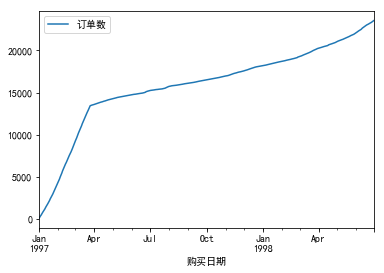

In [159]:
df24.plot(xlim=['1997-01-01','1998-06-30'])


In [160]:
df23.reindex(df24.index).fillna('23570')

,订单数
购买日期,
1997-01-01,209
1997-01-02,450
1997-01-03,678
1997-01-04,852
1997-01-05,1102
1997-01-06,1363
1997-01-07,1574
1997-01-08,1787
1997-01-09,2006


In [161]:
(df23.reindex(df24.index).fillna(23570))-df24
#处于生命周期内的用户数的逐日变化情况

,订单数
购买日期,
1997-01-01,114.0
1997-01-02,229.0
1997-01-03,336.0
1997-01-04,413.0
1997-01-05,533.0
1997-01-06,641.0
1997-01-07,758.0
1997-01-08,858.0
1997-01-09,955.0


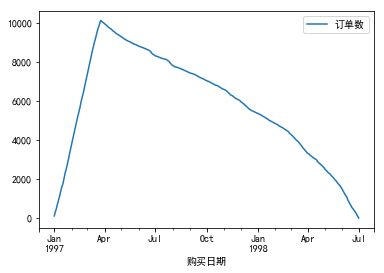

In [162]:
((df23.reindex(df24.index).fillna(23570))-df24).plot()
#可以看到，处于生命周期内的用户数，在前三个月迅速达到最大值后，开始不断降低
#一方面是由于自1997-03-25后再无新增用户
#另一方面是由于老用户的重复购买行为逐渐降低

## （三）各用户——最后（最近）一次消费与当前时间间隔

In [163]:
datetime.now()-pd.to_datetime(df9.groupby(level='用户ID').max()['购买日期'])

用户ID
1       18098 days 23:05:54.807410
2       18098 days 23:05:54.807410
3       18098 days 23:05:54.807400
4       18098 days 23:05:54.807409
5       18098 days 23:05:54.807400
6       18098 days 23:05:54.807410
7       18098 days 23:05:54.807400
8       18098 days 23:05:54.807400
9       18098 days 23:05:54.807400
10      18098 days 23:05:54.807410
11      18098 days 23:05:54.807400
12      18098 days 23:05:54.807410
13      18098 days 23:05:54.807410
14      18098 days 23:05:54.807410
15      18098 days 23:05:54.807410
16      18098 days 23:05:54.807410
17      18098 days 23:05:54.807410
18      18098 days 23:05:54.807410
19      18098 days 23:05:54.807410
20      18098 days 23:05:54.807410
21      18098 days 23:05:54.807410
22      18098 days 23:05:54.807410
23      18098 days 23:05:54.807410
24      18098 days 23:05:54.807400
25      18098 days 23:05:54.807400
26      18098 days 23:05:54.807410
27      18098 days 23:05:54.807410
28      18098 days 23:05:54.807410
29      18098 d

## （四）各用户——生命周期分析

In [164]:
time_range=pd.to_datetime((data.groupby('用户ID'))['购买日期'].max(),format = '%Y%m%d')-pd.to_datetime((data.groupby('用户ID'))['购买日期'].min(),format = '%Y%m%d')
#用户的生命周期定义为：末次购买日期减去首次购买日期

In [165]:
time_range

用户ID
1         0 days
2         0 days
3       511 days
4       345 days
5       367 days
6         0 days
7       445 days
8       452 days
9       523 days
10        0 days
11      415 days
12        0 days
13        0 days
14        0 days
15        0 days
16      252 days
17        0 days
18        0 days
19      160 days
20       17 days
21       12 days
22        0 days
23        0 days
24      384 days
25      523 days
26       25 days
27        5 days
28       66 days
29      480 days
30       44 days
          ...   
23541     8 days
23542     0 days
23543     0 days
23544   305 days
23545     0 days
23546     0 days
23547    13 days
23548     0 days
23549     0 days
23550     0 days
23551   170 days
23552     9 days
23553     3 days
23554   313 days
23555   442 days
23556   439 days
23557     0 days
23558   337 days
23559    94 days
23560     0 days
23561   430 days
23562     0 days
23563   193 days
23564   250 days
23565     0 days
23566     0 days
23567     0 days
23568    

In [166]:
time_range.value_counts().sort_index()

0 days      12054
1 days         76
2 days         49
3 days         44
4 days         38
5 days         52
6 days         54
7 days         65
8 days         56
9 days         37
10 days        37
11 days        47
12 days        38
13 days        54
14 days        45
15 days        45
16 days        47
17 days        34
18 days        26
19 days        39
20 days        38
21 days        29
22 days        32
23 days        31
24 days        28
25 days        32
26 days        22
27 days        40
28 days        35
29 days        21
            ...  
515 days       21
516 days       21
517 days       20
518 days        7
519 days       16
520 days       11
521 days        9
522 days       16
523 days       12
524 days       13
525 days       16
526 days        7
527 days        9
528 days        9
529 days        7
530 days        5
531 days        1
532 days        7
533 days        5
534 days        9
535 days        6
536 days        7
537 days        6
538 days        3
539 days  

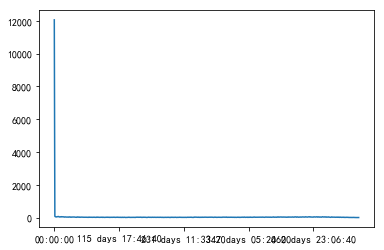

In [167]:
time_range.value_counts().sort_index().plot()

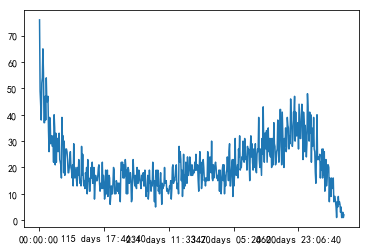

In [168]:
time_range.value_counts().sort_index()[1:].plot()
#生命周期大于0天的用户分布

## （五）各用户——首次回购周期

In [169]:
df13=data[data.用户ID.isin(np.array(data.groupby('用户ID').count().query('订单数>1').index))]
#有重复购买记录的用户的所有购买记录

In [170]:
df13

,用户ID,购买日期,订单数,订单金额
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33
10,4,19970118,2,29.73


In [171]:
df13[['用户ID','购买日期']]#.set_index(df13.购买日期)

,用户ID,购买日期
1,2,19970112
2,2,19970112
3,3,19970102
4,3,19970330
5,3,19970402
6,3,19971115
7,3,19971125
8,3,19980528
9,4,19970101
10,4,19970118


In [172]:
df19=df13[['用户ID','购买日期']].copy()#[['用户ID','购买日期']].set_index(df13.购买日期)

In [173]:
df19

,用户ID,购买日期
1,2,19970112
2,2,19970112
3,3,19970102
4,3,19970330
5,3,19970402
6,3,19971115
7,3,19971125
8,3,19980528
9,4,19970101
10,4,19970118


In [174]:
df19.购买日期=pd.to_datetime(df19.购买日期,format='%Y%m%d')

In [175]:
df19

,用户ID,购买日期
1,2,1997-01-12
2,2,1997-01-12
3,3,1997-01-02
4,3,1997-03-30
5,3,1997-04-02
6,3,1997-11-15
7,3,1997-11-25
8,3,1998-05-28
9,4,1997-01-01
10,4,1997-01-18


In [176]:
df19.pivot_table(index='用户ID',aggfunc='min')

,购买日期
用户ID,
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01
7,1997-01-01
8,1997-01-01
9,1997-01-01
11,1997-01-01
16,1997-01-01


In [177]:
df20=df19.pivot_table(index='用户ID',aggfunc=lambda x:x.iloc[1]-x.iloc[0])
#有重复购买记录的用户，第二次购买距第一次购买的时间间隔

In [178]:
df20

,购买日期
用户ID,
2,0 days
3,87 days
4,17 days
5,13 days
7,283 days
8,43 days
9,132 days
11,27 days
16,193 days


In [179]:
df20.reset_index().购买日期.dt.days.groupby(df20.reset_index().购买日期.dt.days).count()
#有重复购买记录的用户，按照首次回购周期的长度的统计

购买日期
0      351
1      237
2      176
3      189
4      170
5      171
6      191
7      200
8      165
9      112
10     126
11     135
12     144
13     165
14     165
15     156
16     140
17     108
18     115
19     114
20     118
21     115
22      83
23      99
24      85
25      98
26      78
27      92
28      98
29      77
      ... 
489      5
490      1
491      1
492      1
493      1
494      3
495      1
496      1
497      3
499      1
501      3
502      1
503      2
505      1
506      1
508      1
509      1
512      2
513      3
514      2
515      1
516      3
517      1
520      2
522      1
524      1
525      1
528      1
532      2
533      1
Name: 购买日期, Length: 517, dtype: int64

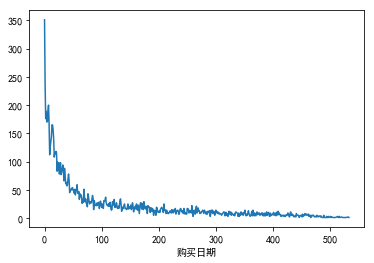

In [180]:
df20.reset_index().购买日期.dt.days.groupby(df20.reset_index().购买日期.dt.days).count().plot()
#可以看到，有回购行为的用户，多数用户的首次回购周期较短
#随着距首次购买的时长的增加，有回购行为的用户越来越少
#因此可以对首次购买之后的一定时长（例如54天？）无购买记录的用户推出优惠活动进行召回

In [181]:
df20.reset_index().购买日期.dt.days.describe()#.groupby(df20.reset_index().购买日期.dt.days).count()

count    11662.000000
mean       108.410907
std        122.005401
min          0.000000
25%         16.000000
50%         54.000000
75%        168.000000
max        533.000000
Name: 购买日期, dtype: float64

## （六）各用户——平均购买周期

In [182]:
df11

订单数    订单金额
用户ID  购买日期                 
1     19970101    1   11.77
2     19970112    1   12.00
      19970112    5   77.00
3     19970102    2   20.76
      19970330    2   20.76
      19970402    2   19.54
      19971115    5   57.45
      19971125    4   20.96
      19980528    1   16.99
4     19970101    2   29.33
      19970118    2   29.73
      19970802    1   14.96
      19971212    2   26.48
5     19970101    2   29.33
      19970114    1   13.97
      19970204    3   38.90
      19970411    3   45.55
      19970531    3   38.71
      19970616    2   26.14
      19970722    2   28.14
      19970915    3   40.47
      19971208    4   46.46
      19971212    3   40.47
      19980103    3   37.47
6     19970101    1   20.99
7     19970101    2   28.74
      19971011    7   97.43
      19980322    9  138.50
8     19970101    1    9.77
      19970213    1   13.97
...             ...     ...
23556 19970927    3   31.47
      19980103    2   28.98
      19980607    2   28.98
23557 19970325    1   14.37
23558 19970325    2   28.13
      19970518    3   45.51
      19970624    2   23.74
      19980225    4   48.22
23559 19970325    2   23.54
      19970518    3   35.31
      19970627    3   52.80
23560 19970325    1   18.36
23561 19970325    2   30.92
      19980128    1   15.49
      19980529    3   37.05
23562 19970325    2   29.33
23563 19970325    1   10.77
      19971004    2   47.98
23564 19970325    1   11.77
      19970521    1   11.77
      19971130    3   46.47
23565 19970325    1   11.77
23566 19970325    2   36.00
23567 19970325    1   20.97
23568 19970325    1   22.97
      19970405    4   83.74
      19970422    1   14.99
23569 19970325    2   25.74
23570 19970325    3   51.12
      19970326    2   42.96

[69659 rows x 2 columns]

In [183]:
df11.iloc[data.groupby('用户ID').count().query('订单数>1').index]

订单数    订单金额
用户ID 购买日期                 
2    19970112    5   77.00
3    19970102    2   20.76
     19970330    2   20.76
     19970402    2   19.54
     19971125    4   20.96
     19980528    1   16.99
4    19970101    2   29.33
     19970802    1   14.96
5    19970411    3   45.55
     19970722    2   28.14
     19970915    3   40.47
     19971208    4   46.46
6    19970101    1   20.99
7    19970101    2   28.74
     19971011    7   97.43
     19980322    9  138.50
8    19970101    1    9.77
     19970213    1   13.97
     19970617    3   45.29
     19970703    2   36.76
     19971116    1    2.99
     19971116    7   50.43
     19980329    2   24.46
9    19970101    2   23.54
     19970513    2   30.33
10   19970121    3   39.31
11   19970101    1   13.49
     19970317    1   12.77
     19980220    1   12.99
12   19970101    4   57.06
...            ...     ...
7572 19970310    1   14.96
     19970423    1   13.97
7573 19970206    3   43.32
7575 19970207    2   89.98
7579 19970129    4   67.47
7582 19970623    1   15.36
     19971118    1   14.49
7585 19971229    2   25.48
7586 19970804    4   49.27
     19970804    4   44.48
7587 19970130    1   14.37
     19970416    1   14.37
     19970523    1   15.96
     19970930    1   20.99
     19971129    1   12.99
7589 19970209    4   61.50
     19971029    2   25.98
7590 19980402    1    9.99
     19980403    1   14.99
     19980413    3   33.97
     19980418    1   13.99
7591 19970129    3   47.12
     19970328    3   43.30
     19970813    5   67.62
     19971130    1   12.99
     19980329    3   43.06
7592 19970130    2   26.14
     19970201    4   71.71
     19970214    1   11.77
     19970216    4   56.86

[11662 rows x 2 columns]

In [184]:
#有重复购买记录的用户的购买记录的索引(用户ID)
np.array(data.groupby('用户ID').count().query('订单数>1').index)

array([    2,     3,     4, ..., 23564, 23568, 23570], dtype=int64)

In [185]:
data.用户ID.isin([1,2,3])
#将上述[1,2,3]替换为有重复购买记录的用户的购买记录的用户ID

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
69629    False
69630    False
69631    False
69632    False
69633    False
69634    False
69635    False
69636    False
69637    False
69638    False
69639    False
69640    False
69641    False
69642    False
69643    False
69644    False
69645    False
69646    False
69647    False
69648    False
69649    False
69650    False
69651    False
69652    False
69653    False
69654    False
69655    False
69656    False
69657    False
69658    False
Name: 用户ID, Length: 69659, dtype: bool

In [186]:
data.用户ID.isin(np.array(data.groupby('用户ID').count().query('订单数>1').index))
#检测用户ID是否是有重复购买记录的用户ID

0        False
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24       False
25        True
26        True
27        True
28        True
29        True
         ...  
69629     True
69630     True
69631     True
69632    False
69633     True
69634     True
69635     True
69636     True
69637     True
69638     True
69639     True
69640    False
69641     True
69642     True
69643     True
69644    False
69645     True
69646     True
69647     True
69648     True
69649     True
69650    False
69651    False
69652    False
69653     True
69654     True
69655     True
69656    False
69657     True
69658     True
Name: 用户ID, Length: 69659, dtype: bool

In [187]:
df13=data[data.用户ID.isin(np.array(data.groupby('用户ID').count().query('订单数>1').index))]
#有重复购买记录的用户的所有购买记录

In [188]:
df13

,用户ID,购买日期,订单数,订单金额
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33
10,4,19970118,2,29.73


In [189]:
df13.index=df13.用户ID

In [190]:
df13[df13.用户ID==4]

,用户ID,购买日期,订单数,订单金额
用户ID,,,,
4,4,19970101,2,29.33
4,4,19970118,2,29.73
4,4,19970802,1,14.96
4,4,19971212,2,26.48


In [191]:
pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d')

用户ID
4   1997-01-01
4   1997-01-18
4   1997-08-02
4   1997-12-12
Name: 购买日期, dtype: datetime64[ns]

In [192]:
pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d').shift(1)

用户ID
4        NaT
4    17 days
4   196 days
4   132 days
Name: 购买日期, dtype: timedelta64[ns]

In [193]:
(pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d').shift(1)).dropna()

用户ID
4    17 days
4   196 days
4   132 days
Name: 购买日期, dtype: timedelta64[ns]

In [194]:
(pd.to_datetime(df13[df13.用户ID==5].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==5].购买日期,format='%Y%m%d').shift(1)).dropna()

用户ID
5   13 days
5   21 days
5   66 days
5   50 days
5   16 days
5   36 days
5   55 days
5   84 days
5    4 days
5   22 days
Name: 购买日期, dtype: timedelta64[ns]

In [195]:
pd.concat([(pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d').shift(1)).dropna(),
          (pd.to_datetime(df13[df13.用户ID==5].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==5].购买日期,format='%Y%m%d').shift(1)).dropna()])

用户ID
4    17 days
4   196 days
4   132 days
5    13 days
5    21 days
5    66 days
5    50 days
5    16 days
5    36 days
5    55 days
5    84 days
5     4 days
5    22 days
Name: 购买日期, dtype: timedelta64[ns]

In [196]:
period=pd.Series([])

In [197]:
period

Series([], dtype: float64)

In [198]:
s1=pd.concat([period,(pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==4].购买日期,format='%Y%m%d').shift(1)).dropna()])

In [199]:
s1

4    17 days
4   196 days
4   132 days
dtype: timedelta64[ns]

In [200]:
s1=pd.concat([s1,(pd.to_datetime(df13[df13.用户ID==5].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==5].购买日期,format='%Y%m%d').shift(1)).dropna()])

In [201]:
s1

4    17 days
4   196 days
4   132 days
5    13 days
5    21 days
5    66 days
5    50 days
5    16 days
5    36 days
5    55 days
5    84 days
5     4 days
5    22 days
dtype: timedelta64[ns]

In [202]:
period=pd.Series([])
for i in np.array(data.groupby('用户ID').count().query('订单数>1').index):
    period=pd.concat([period,(pd.to_datetime(df13[df13.用户ID==i].购买日期,format='%Y%m%d')-pd.to_datetime(df13[df13.用户ID==i].购买日期,format='%Y%m%d').shift(1)).dropna()])
period
#运行时间很长

2         0 days
3        87 days
3         3 days
3       227 days
3        10 days
3       184 days
4        17 days
4       196 days
4       132 days
5        13 days
5        21 days
5        66 days
5        50 days
5        16 days
5        36 days
5        55 days
5        84 days
5         4 days
5        22 days
7       283 days
7       162 days
8        43 days
8       124 days
8        16 days
8       136 days
8         0 days
8        39 days
8        94 days
9       132 days
9       391 days
          ...   
23551    50 days
23551     7 days
23551    20 days
23551     7 days
23552     9 days
23553     3 days
23554   313 days
23555   214 days
23555    60 days
23555   128 days
23555    40 days
23556    77 days
23556    39 days
23556     7 days
23556    63 days
23556    98 days
23556   155 days
23558    54 days
23558    37 days
23558   246 days
23559    54 days
23559    40 days
23561   309 days
23561   121 days
23563   193 days
23564    57 days
23564   193 days
23568    11 da

In [203]:
period

2         0 days
3        87 days
3         3 days
3       227 days
3        10 days
3       184 days
4        17 days
4       196 days
4       132 days
5        13 days
5        21 days
5        66 days
5        50 days
5        16 days
5        36 days
5        55 days
5        84 days
5         4 days
5        22 days
7       283 days
7       162 days
8        43 days
8       124 days
8        16 days
8       136 days
8         0 days
8        39 days
8        94 days
9       132 days
9       391 days
          ...   
23551    50 days
23551     7 days
23551    20 days
23551     7 days
23552     9 days
23553     3 days
23554   313 days
23555   214 days
23555    60 days
23555   128 days
23555    40 days
23556    77 days
23556    39 days
23556     7 days
23556    63 days
23556    98 days
23556   155 days
23558    54 days
23558    37 days
23558   246 days
23559    54 days
23559    40 days
23561   309 days
23561   121 days
23563   193 days
23564    57 days
23564   193 days
23568    11 da

In [204]:
period.mean()
#平均购买周期

Timedelta('68 days 23:22:13.567662')

In [205]:
period.dt.days.mean()
#转换为int后在计算平均购买周期

68.97376814424265

In [206]:
period.dt.days.value_counts()
#购买周期的天数，及按周期的天数统计的购买周期的数量

0      2068
1      1352
2      1117
7      1093
3      1055
6      1015
5       965
4       958
8       801
14      790
9       756
12      715
13      698
10      681
15      675
11      645
21      631
16      597
17      561
20      549
22      516
19      516
18      511
28      501
23      457
27      453
25      435
24      415
29      414
26      398
       ... 
485       3
520       2
488       2
514       2
532       2
437       2
491       2
490       2
503       2
473       2
505       2
483       2
525       1
496       1
524       1
495       1
522       1
493       1
492       1
487       1
528       1
499       1
509       1
486       1
502       1
517       1
508       1
515       1
506       1
533       1
Length: 517, dtype: int64

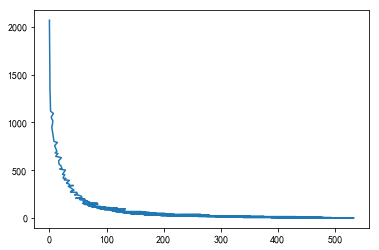

In [207]:
period.dt.days.value_counts().plot()


## （七）各用户——各月复购率

* 复购率：在某时间窗口内消费两次及以上的用户在总消费用户中占比。   
换个意思就是，消费两次及以上记为1，消费一次记为0。

In [208]:
data

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [209]:
df11[['订单数']]#.groupby(level=[0,1]).sum()#.unstack()

订单数
用户ID  购买日期         
1     19970101    1
2     19970112    1
      19970112    5
3     19970102    2
      19970330    2
      19970402    2
      19971115    5
      19971125    4
      19980528    1
4     19970101    2
      19970118    2
      19970802    1
      19971212    2
5     19970101    2
      19970114    1
      19970204    3
      19970411    3
      19970531    3
      19970616    2
      19970722    2
      19970915    3
      19971208    4
      19971212    3
      19980103    3
6     19970101    1
7     19970101    2
      19971011    7
      19980322    9
8     19970101    1
      19970213    1
...             ...
23556 19970927    3
      19980103    2
      19980607    2
23557 19970325    1
23558 19970325    2
      19970518    3
      19970624    2
      19980225    4
23559 19970325    2
      19970518    3
      19970627    3
23560 19970325    1
23561 19970325    2
      19980128    1
      19980529    3
23562 19970325    2
23563 19970325    1
      19971004    2
23564 19970325    1
      19970521    1
      19971130    3
23565 19970325    1
23566 19970325    2
23567 19970325    1
23568 19970325    1
      19970405    4
      19970422    1
23569 19970325    2
23570 19970325    3
      19970326    2

[69659 rows x 1 columns]

In [210]:
df11[['订单数']].groupby(level=[0,1]).count()#.unstack()

订单数
用户ID  购买日期         
1     19970101    1
2     19970112    2
3     19970102    1
      19970330    1
      19970402    1
      19971115    1
      19971125    1
      19980528    1
4     19970101    1
      19970118    1
      19970802    1
      19971212    1
5     19970101    1
      19970114    1
      19970204    1
      19970411    1
      19970531    1
      19970616    1
      19970722    1
      19970915    1
      19971208    1
      19971212    1
      19980103    1
6     19970101    1
7     19970101    1
      19971011    1
      19980322    1
8     19970101    1
      19970213    1
      19970617    1
...             ...
23556 19970927    1
      19980103    1
      19980607    1
23557 19970325    1
23558 19970325    1
      19970518    1
      19970624    1
      19980225    1
23559 19970325    1
      19970518    1
      19970627    1
23560 19970325    1
23561 19970325    1
      19980128    1
      19980529    1
23562 19970325    1
23563 19970325    1
      19971004    1
23564 19970325    1
      19970521    1
      19971130    1
23565 19970325    1
23566 19970325    1
23567 19970325    1
23568 19970325    1
      19970405    1
      19970422    1
23569 19970325    1
23570 19970325    1
      19970326    1

[67591 rows x 1 columns]

In [211]:
df11[['订单数']].groupby(level=[0,1]).count().unstack()

订单数                                                                 \
购买日期  19970101 19970102 19970103 19970104 19970105 19970106 19970107 19970108   
用户ID                                                                            
1          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2          NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3          NaN      1.0      NaN      NaN      NaN      NaN      NaN      NaN   
4          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9          1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
13         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
15         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
17         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
18         NaN      NaN      NaN      1.0      NaN      NaN      NaN      NaN   
19         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
21         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
22         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
24         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
25         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
26         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
27         NaN      NaN      NaN      NaN      NaN      NaN      1.0      NaN   
28         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
29         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
30         1.0      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...        ...      ...      ...      ...      ...      ...      ...      ...   
23541      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23542      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23543      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23544      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23545      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23546      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23547      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23548      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23549      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23550      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23551      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23552      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23553      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23554      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23555      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23556      NaN      NaN      NaN      NaN 

In [212]:
df11[['订单数']].groupby(level=[0,1]).count().unstack().T

用户ID          1      2      3      4      5      6      7      8      9      \
    购买日期                                                                      
订单数 19970101    1.0    NaN    NaN    1.0    1.0    1.0    1.0    1.0    1.0   
    19970102    NaN    NaN    1.0    NaN    NaN    NaN    NaN    NaN    NaN   
    19970103    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970104    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970105    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970106    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970107    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970108    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970109    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970110    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970111    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970112    NaN    2.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970113    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970114    NaN    NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN   
    19970115    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970116    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970117    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970118    NaN    NaN    NaN    1.0    NaN    NaN    NaN    NaN    NaN   
    19970119    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970120    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970121    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970122    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970123    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970124    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970125    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970126    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970127    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970128    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970129    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19970130    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...             ...    ...    ...    ...    ...    ...    ...    ...    ...   
    19980601    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980602    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980603    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980604    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980605    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980606    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980607    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980608    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    1.0   
    19980609    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980610    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980611    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980612    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980613    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980614    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980615    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980616    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980617    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
    19980618    NaN    NaN    NaN    NaN    NaN   

In [213]:
df16=df11[['订单数']].groupby(level=[0,1]).count().unstack().T.groupby(level=1).sum()
#去掉了

In [214]:
df16

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
19970101,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
df16.index=pd.to_datetime(df16.index,format='%Y%m%d')

In [216]:
df16

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01-01,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
df16.resample('m').sum()
#统计每个客户在每个月的购买次数

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01-31,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-02-28,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-03-31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
1997-04-30,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1997-05-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-06-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-07-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-08-31,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
df16.resample('m').sum().T
#每个用户在每个月的购买总次数

购买日期,1997-01-31 00:00:00,1997-02-28 00:00:00,1997-03-31 00:00:00,1997-04-30 00:00:00,1997-05-31 00:00:00,1997-06-30 00:00:00,1997-07-31 00:00:00,1997-08-31 00:00:00,1997-09-30 00:00:00,1997-10-31 00:00:00,1997-11-30 00:00:00,1997-12-31 00:00:00,1998-01-31 00:00:00,1998-02-28 00:00:00,1998-03-31 00:00:00,1998-04-30 00:00:00,1998-05-31 00:00:00,1998-06-30 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [219]:
df17=df16.resample('m').sum().T>1
#横纵坐标为真的，就是当月该用户发生了复购

In [220]:
df17

购买日期,1997-01-31 00:00:00,1997-02-28 00:00:00,1997-03-31 00:00:00,1997-04-30 00:00:00,1997-05-31 00:00:00,1997-06-30 00:00:00,1997-07-31 00:00:00,1997-08-31 00:00:00,1997-09-30 00:00:00,1997-10-31 00:00:00,1997-11-30 00:00:00,1997-12-31 00:00:00,1998-01-31 00:00:00,1998-02-28 00:00:00,1998-03-31 00:00:00,1998-04-30 00:00:00,1998-05-31 00:00:00,1998-06-30 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [221]:
df17=df17.T.reset_index()

In [222]:
df17

用户ID,购买日期,1,2,3,4,5,6,7,8,9,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
0,1997-01-31,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997-02-28,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997-03-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1997-04-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1997-05-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997-06-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1997-07-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1997-08-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1997-09-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1997-10-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [223]:
df17.replace({1:True,2:True},df17.购买日期[0])
#怎样将True替换为购买日期？？

用户ID,购买日期,1,2,3,4,5,6,7,8,9,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
0,1997-01-31,False,1997-01-31 00:00:00,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997-02-28,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997-03-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1997-04-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1997-05-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997-06-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1997-07-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1997-08-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1997-09-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1997-10-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [224]:
df17[2]

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
Name: 2, dtype: bool

In [225]:
df17.购买日期

0    1997-01-31
1    1997-02-28
2    1997-03-31
3    1997-04-30
4    1997-05-31
5    1997-06-30
6    1997-07-31
7    1997-08-31
8    1997-09-30
9    1997-10-31
10   1997-11-30
11   1997-12-31
12   1998-01-31
13   1998-02-28
14   1998-03-31
15   1998-04-30
16   1998-05-31
17   1998-06-30
Name: 购买日期, dtype: datetime64[ns]

In [226]:
df17.购买日期[1]

Timestamp('1997-02-28 00:00:00')

In [227]:
df17[2].replace(True,df17.购买日期[1])

0     1997-02-28 00:00:00
1                   False
2                   False
3                   False
4                   False
5                   False
6                   False
7                   False
8                   False
9                   False
10                  False
11                  False
12                  False
13                  False
14                  False
15                  False
16                  False
17                  False
Name: 2, dtype: object

In [228]:
df17

用户ID,购买日期,1,2,3,4,5,6,7,8,9,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
0,1997-01-31,False,True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1997-02-28,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1997-03-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1997-04-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1997-05-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1997-06-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1997-07-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1997-08-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1997-09-30,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1997-10-31,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [229]:
df17.set_index('购买日期')#.reset_index()

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01-31,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997-02-28,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997-03-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1997-04-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1997-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997-06-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997-07-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997-08-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [230]:
df17.set_index('购买日期').unstack()

用户ID   购买日期      
1      1997-01-31    False
       1997-02-28    False
       1997-03-31    False
       1997-04-30    False
       1997-05-31    False
       1997-06-30    False
       1997-07-31    False
       1997-08-31    False
       1997-09-30    False
       1997-10-31    False
       1997-11-30    False
       1997-12-31    False
       1998-01-31    False
       1998-02-28    False
       1998-03-31    False
       1998-04-30    False
       1998-05-31    False
       1998-06-30    False
2      1997-01-31     True
       1997-02-28    False
       1997-03-31    False
       1997-04-30    False
       1997-05-31    False
       1997-06-30    False
       1997-07-31    False
       1997-08-31    False
       1997-09-30    False
       1997-10-31    False
       1997-11-30    False
       1997-12-31    False
                     ...  
23569  1997-07-31    False
       1997-08-31    False
       1997-09-30    False
       1997-10-31    False
       1997-11-30    False
       199

In [231]:
type(df17.set_index('购买日期').unstack())

pandas.core.series.Series

In [232]:
pd.DataFrame(df17.set_index('购买日期').unstack())

0
用户ID  购买日期             
1     1997-01-31  False
      1997-02-28  False
      1997-03-31  False
      1997-04-30  False
      1997-05-31  False
      1997-06-30  False
      1997-07-31  False
      1997-08-31  False
      1997-09-30  False
      1997-10-31  False
      1997-11-30  False
      1997-12-31  False
      1998-01-31  False
      1998-02-28  False
      1998-03-31  False
      1998-04-30  False
      1998-05-31  False
      1998-06-30  False
2     1997-01-31   True
      1997-02-28  False
      1997-03-31  False
      1997-04-30  False
      1997-05-31  False
      1997-06-30  False
      1997-07-31  False
      1997-08-31  False
      1997-09-30  False
      1997-10-31  False
      1997-11-30  False
      1997-12-31  False
...                 ...
23569 1997-07-31  False
      1997-08-31  False
      1997-09-30  False
      1997-10-31  False
      1997-11-30  False
      1997-12-31  False
      1998-01-31  False
      1998-02-28  False
      1998-03-31  False
      1998-04-30  False
      1998-05-31  False
      1998-06-30  False
23570 1997-01-31  False
      1997-02-28  False
      1997-03-31   True
      1997-04-30  False
      1997-05-31  False
      1997-06-30  False
      1997-07-31  False
      1997-08-31  False
      1997-09-30  False
      1997-10-31  False
      1997-11-30  False
      1997-12-31  False
      1998-01-31  False
      1998-02-28  False
      1998-03-31  False
      1998-04-30  False
      1998-05-31  False
      1998-06-30  False

[424260 rows x 1 columns]

In [233]:
pd.DataFrame(df17.set_index('购买日期').unstack())[0]

用户ID   购买日期      
1      1997-01-31    False
       1997-02-28    False
       1997-03-31    False
       1997-04-30    False
       1997-05-31    False
       1997-06-30    False
       1997-07-31    False
       1997-08-31    False
       1997-09-30    False
       1997-10-31    False
       1997-11-30    False
       1997-12-31    False
       1998-01-31    False
       1998-02-28    False
       1998-03-31    False
       1998-04-30    False
       1998-05-31    False
       1998-06-30    False
2      1997-01-31     True
       1997-02-28    False
       1997-03-31    False
       1997-04-30    False
       1997-05-31    False
       1997-06-30    False
       1997-07-31    False
       1997-08-31    False
       1997-09-30    False
       1997-10-31    False
       1997-11-30    False
       1997-12-31    False
                     ...  
23569  1997-07-31    False
       1997-08-31    False
       1997-09-30    False
       1997-10-31    False
       1997-11-30    False
       199

In [234]:
pd.DataFrame(df17.set_index('购买日期').unstack())[pd.DataFrame(df17.set_index('购买日期').unstack())[0]]
#找出了在一个月内有重复购买记录的用户，及其有重复购买记录的月份

0
用户ID  购买日期            
2     1997-01-31  True
3     1997-11-30  True
4     1997-01-31  True
5     1997-01-31  True
      1997-12-31  True
8     1997-11-30  True
11    1997-01-31  True
16    1997-07-31  True
20    1997-01-31  True
21    1997-01-31  True
25    1998-06-30  True
26    1997-01-31  True
27    1997-01-31  True
28    1997-01-31  True
29    1997-04-30  True
      1997-05-31  True
      1997-07-31  True
31    1998-04-30  True
32    1997-01-31  True
33    1997-01-31  True
      1997-05-31  True
      1997-06-30  True
      1997-10-31  True
      1997-11-30  True
      1998-03-31  True
39    1998-03-31  True
40    1997-09-30  True
      1997-12-31  True
      1998-02-28  True
42    1997-01-31  True
...                ...
23436 1998-02-28  True
23444 1997-03-31  True
      1997-11-30  True
23454 1997-03-31  True
      1997-04-30  True
      1997-06-30  True
      1997-07-31  True
      1998-05-31  True
23456 1998-01-31  True
23466 1997-03-31  True
23476 1997-03-31  True
23477 1997-09-30  True
23487 1998-04-30  True
23490 1998-04-30  True
23499 1997-04-30  True
23500 1997-05-31  True
      1997-07-31  True
23501 1997-04-30  True
23507 1997-08-31  True
23517 1998-01-31  True
23532 1997-04-30  True
      1997-05-31  True
      1997-11-30  True
23534 1997-09-30  True
23551 1997-08-31  True
      1997-09-30  True
23553 1997-03-31  True
23556 1997-07-31  True
23568 1997-04-30  True
23570 1997-03-31  True

[9421 rows x 1 columns]

In [235]:
df18=pd.DataFrame(df17.set_index('购买日期').unstack())[pd.DataFrame(df17.set_index('购买日期').unstack())[0]].reset_index()


In [236]:
df18=df18[['用户ID','购买日期']].set_index(df18.购买日期)[['用户ID']]

In [237]:
df18

,用户ID
购买日期,
1997-01-31,2
1997-11-30,3
1997-01-31,4
1997-01-31,5
1997-12-31,5
1997-11-30,8
1997-01-31,11
1997-07-31,16
1997-01-31,20


In [238]:
df18.T

购买日期,1997-01-31 00:00:00,1997-11-30 00:00:00,1997-01-31 00:00:00,1997-01-31 00:00:00,1997-12-31 00:00:00,1997-11-30 00:00:00,1997-01-31 00:00:00,1997-07-31 00:00:00,1997-01-31 00:00:00,1997-01-31 00:00:00,...,1997-04-30 00:00:00,1997-05-31 00:00:00,1997-11-30 00:00:00,1997-09-30 00:00:00,1997-08-31 00:00:00,1997-09-30 00:00:00,1997-03-31 00:00:00,1997-07-31 00:00:00,1997-04-30 00:00:00,1997-03-31 00:00:00
用户ID,2,3,4,5,5,8,11,16,20,21,...,23532,23532,23532,23534,23551,23551,23553,23556,23568,23570


In [239]:
##df18.get_dummies

## （八）各用户——各月回购率

* 回购率：某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。  
换个意思就是，如果用户本月消费过且下个月进行过消费记为1，如果用户本月消费过且下个月没有进行过消费记为0。

In [240]:
df11

订单数    订单金额
用户ID  购买日期                 
1     19970101    1   11.77
2     19970112    1   12.00
      19970112    5   77.00
3     19970102    2   20.76
      19970330    2   20.76
      19970402    2   19.54
      19971115    5   57.45
      19971125    4   20.96
      19980528    1   16.99
4     19970101    2   29.33
      19970118    2   29.73
      19970802    1   14.96
      19971212    2   26.48
5     19970101    2   29.33
      19970114    1   13.97
      19970204    3   38.90
      19970411    3   45.55
      19970531    3   38.71
      19970616    2   26.14
      19970722    2   28.14
      19970915    3   40.47
      19971208    4   46.46
      19971212    3   40.47
      19980103    3   37.47
6     19970101    1   20.99
7     19970101    2   28.74
      19971011    7   97.43
      19980322    9  138.50
8     19970101    1    9.77
      19970213    1   13.97
...             ...     ...
23556 19970927    3   31.47
      19980103    2   28.98
      19980607    2   28.98
23557 19970325    1   14.37
23558 19970325    2   28.13
      19970518    3   45.51
      19970624    2   23.74
      19980225    4   48.22
23559 19970325    2   23.54
      19970518    3   35.31
      19970627    3   52.80
23560 19970325    1   18.36
23561 19970325    2   30.92
      19980128    1   15.49
      19980529    3   37.05
23562 19970325    2   29.33
23563 19970325    1   10.77
      19971004    2   47.98
23564 19970325    1   11.77
      19970521    1   11.77
      19971130    3   46.47
23565 19970325    1   11.77
23566 19970325    2   36.00
23567 19970325    1   20.97
23568 19970325    1   22.97
      19970405    4   83.74
      19970422    1   14.99
23569 19970325    2   25.74
23570 19970325    3   51.12
      19970326    2   42.96

[69659 rows x 2 columns]

In [241]:
df14=df11[['订单金额']].groupby(level=[0,1]).sum().unstack()#.T.cumsum().ffill().T.fillna(0)

In [242]:
df14

订单金额                                                                 \
购买日期  19970101 19970102 19970103 19970104 19970105 19970106 19970107 19970108   
用户ID                                                                            
1        11.77      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2          NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3          NaN    20.76      NaN      NaN      NaN      NaN      NaN      NaN   
4        29.33      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5        29.33      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6        20.99      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7        28.74      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8         9.77      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9        23.54      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
10         NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
11       13.49      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
12       57.06      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
13       72.94      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
14       29.92      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
15       52.87      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
16        9.77      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
17       73.22      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
18         NaN      NaN      NaN    14.96      NaN      NaN      NaN      NaN   
19      163.35      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
20      363.60      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
21       63.34      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
22       14.37      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23       24.74      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
24       47.28      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
25       24.96      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
26       42.72      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
27         NaN      NaN      NaN      NaN      NaN      NaN    83.41      NaN   
28       39.51      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
29       46.72      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
30       14.37      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...        ...      ...      ...      ...      ...      ...      ...      ...   
23541      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23542      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23543      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23544      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23545      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23546      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23547      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23548      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23549      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23550      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23551      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23552      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23553      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23554      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23555      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
23556      NaN      NaN      NaN      NaN

In [243]:
df14.T.reset_index()#.T[1:].reset_index().T

用户ID,level_0,购买日期,1,2,3,4,5,6,7,8,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
0,订单金额,19970101,11.77,NaN,NaN,29.33,29.33,20.99,28.74,9.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,订单金额,19970102,NaN,NaN,20.76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,订单金额,19970103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,订单金额,19970104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,订单金额,19970105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,订单金额,19970106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,订单金额,19970107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,订单金额,19970108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,订单金额,19970109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,订单金额,19970110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
df14.T.reset_index().T[1:]#.reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,536,537,538,539,540,541,542,543,544,545
用户ID,,,,,,,,,,,,,,,,,,,,,
购买日期,19970101,19970102,19970103,19970104,19970105,19970106,19970107,19970108,19970109,19970110,...,19980621,19980622,19980623,19980624,19980625,19980626,19980627,19980628,19980629,19980630
1,11.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,20.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,29.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,28.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
df14.T.reset_index().T[1:].reset_index()#.T

,用户ID,0,1,2,3,4,5,6,7,8,...,536,537,538,539,540,541,542,543,544,545
0,购买日期,19970101,19970102,19970103,19970104,19970105,19970106,19970107,19970108,19970109,...,19980621,19980622,19980623,19980624,19980625,19980626,19980627,19980628,19980629,19980630
1,1,11.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,20.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,29.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,29.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,20.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,28.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,23.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
data

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [247]:
df14.T

用户ID           1      2      3      4      5      6      7      8      9      \
     购买日期                                                                      
订单金额 19970101  11.77    NaN    NaN  29.33  29.33  20.99  28.74   9.77  23.54   
     19970102    NaN    NaN  20.76    NaN    NaN    NaN    NaN    NaN    NaN   
     19970103    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970104    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970105    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970106    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970107    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970108    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970109    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970110    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970111    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970112    NaN   89.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970113    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970114    NaN    NaN    NaN    NaN  13.97    NaN    NaN    NaN    NaN   
     19970115    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970116    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970117    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970118    NaN    NaN    NaN  29.73    NaN    NaN    NaN    NaN    NaN   
     19970119    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970120    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970121    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970122    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970123    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970124    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970125    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970126    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970127    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970128    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970129    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19970130    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
     19980601    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980602    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980603    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980604    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980605    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980606    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980607    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980608    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  41.98   
     19980609    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980610    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980611    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980612    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980613    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980614    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980615    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980616    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
     19980617    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   


In [248]:
df15=df14.T.groupby(level=1).sum()
#与上述的df14.T 相比，去掉了层次化索引“订单金额”

In [249]:
df15

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
19970101,11.77,0.0,0.00,29.33,29.33,20.99,28.74,9.77,23.54,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970102,0.00,0.0,20.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970103,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970104,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970105,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970106,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970107,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970108,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19970109,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
df15.index=pd.to_datetime(df15.index,format='%Y%m%d')

In [251]:
df15

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01-01,11.77,0.0,0.00,29.33,29.33,20.99,28.74,9.77,23.54,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-02,0.00,0.0,20.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-03,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-04,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-05,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-06,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-07,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-08,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-09,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
df15.resample('m').sum()
#每个用户的逐月购买记录

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01-31,11.77,89.0,20.76,59.06,43.30,20.99,28.74,9.77,23.54,39.31,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1997-02-28,0.00,0.0,0.00,0.00,38.90,0.00,0.00,13.97,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1997-03-31,0.00,0.0,20.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,30.92,29.33,10.77,11.77,11.77,36.0,20.97,22.97,25.74,94.08
1997-04-30,0.00,0.0,19.54,0.00,45.55,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,98.73,0.00,0.00
1997-05-31,0.00,0.0,0.00,0.00,38.71,0.00,0.00,0.00,30.33,0.00,...,0.00,0.00,0.00,11.77,0.00,0.0,0.00,0.00,0.00,0.00
1997-06-30,0.00,0.0,0.00,0.00,26.14,0.00,0.00,45.29,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1997-07-31,0.00,0.0,0.00,0.00,28.14,0.00,0.00,36.76,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1997-08-31,0.00,0.0,0.00,14.96,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1997-09-30,0.00,0.0,0.00,0.00,40.47,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00


## （九）各用户——各月留存率

* 留存率：当月有过购买记录的用户，次月也进行了购买，则该用户称为月留存用户。次月留存用户除以当月有购买记录的用户，得到次月留存率。   
参：https://blog.csdn.net/weixin_34409357/article/details/92487839

In [253]:
df15

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01-01,11.77,0.0,0.00,29.33,29.33,20.99,28.74,9.77,23.54,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-02,0.00,0.0,20.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-03,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-04,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-05,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-06,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-07,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-08,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997-01-09,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [254]:
df21=df15.resample('m').sum().T

In [255]:
df21

购买日期,1997-01-31 00:00:00,1997-02-28 00:00:00,1997-03-31 00:00:00,1997-04-30 00:00:00,1997-05-31 00:00:00,1997-06-30 00:00:00,1997-07-31 00:00:00,1997-08-31 00:00:00,1997-09-30 00:00:00,1997-10-31 00:00:00,1997-11-30 00:00:00,1997-12-31 00:00:00,1998-01-31 00:00:00,1998-02-28 00:00:00,1998-03-31 00:00:00,1998-04-30 00:00:00,1998-05-31 00:00:00,1998-06-30 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,11.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,89.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20.76,0.00,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.00,78.41,0.00,0.00,0.00,0.00,0.00,16.99,0.00
4,59.06,0.00,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.00,0.00,26.48,0.00,0.00,0.00,0.00,0.00,0.00
5,43.30,38.90,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.00,0.00,86.93,37.47,0.00,0.00,0.00,0.00,0.00
6,20.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,28.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.43,0.00,0.00,0.00,0.00,138.50,0.00,0.00,0.00
8,9.77,13.97,0.00,0.00,0.00,45.29,36.76,0.00,0.00,0.00,53.42,13.99,0.00,0.00,24.46,0.00,0.00,0.00
9,23.54,0.00,0.00,0.00,30.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41.98


In [256]:
df21.columns=df21.columns.to_period()

In [257]:
df21

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,11.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,89.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20.76,0.00,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.00,78.41,0.00,0.00,0.00,0.00,0.00,16.99,0.00
4,59.06,0.00,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.00,0.00,26.48,0.00,0.00,0.00,0.00,0.00,0.00
5,43.30,38.90,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.00,0.00,86.93,37.47,0.00,0.00,0.00,0.00,0.00
6,20.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,28.74,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,97.43,0.00,0.00,0.00,0.00,138.50,0.00,0.00,0.00
8,9.77,13.97,0.00,0.00,0.00,45.29,36.76,0.00,0.00,0.00,53.42,13.99,0.00,0.00,24.46,0.00,0.00,0.00
9,23.54,0.00,0.00,0.00,30.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41.98


In [258]:
df21.sort_values(by='1997-01',ascending=False)

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1412,691.38,0.00,0.00,0.00,0.00,0.00,0.00,558.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,366.25,0.00,0.00
20,653.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
457,509.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
586,485.36,348.77,243.30,83.42,172.24,490.59,167.79,299.51,187.87,233.37,137.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2073,468.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3506,455.05,255.87,68.35,471.73,168.41,230.40,80.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6950,432.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
887,422.29,72.95,173.18,0.00,0.00,0.00,0.00,0.00,151.52,0.00,0.00,0.00,0.00,67.45,137.45,0.00,0.00,0.00
4410,421.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,379.74,0.00,0.00,120.51,0.00,0.00,140.87,0.00


In [259]:
(df21>0).astype(int)

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
8,1,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0
9,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [260]:
(df21>0).astype(int).T

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1997-02,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1997-03,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1997-04,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1997-05,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1997-06,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1997-07,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1997-08,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997-09,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
(df21>0).astype(int).T.replace(0,np.nan)
#将0（就是当月无购买记录）替换为缺失值
#统计每一行的非缺失值的个数，就得到每个月有购买记录的用户数

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1997-04,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1997-05,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-06,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-08,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
((df21>0).astype(int).T.replace(0,np.nan)).T.count()

购买日期
1997-01    7814
1997-02    9610
1997-03    9506
1997-04    2822
1997-05    2214
1997-06    2339
1997-07    2180
1997-08    1772
1997-09    1739
1997-10    1839
1997-11    2028
1997-12    1864
1998-01    1537
1998-02    1551
1998-03    2058
1998-04    1436
1998-05    1488
1998-06    1506
Freq: M, dtype: int64

In [263]:
((df21>0).astype(int).T.replace(0,np.nan)).T.count().shift(1)
#向后位移一行，以便于计算从第二个月开始的回购率

购买日期
1997-01       NaN
1997-02    7814.0
1997-03    9610.0
1997-04    9506.0
1997-05    2822.0
1997-06    2214.0
1997-07    2339.0
1997-08    2180.0
1997-09    1772.0
1997-10    1739.0
1997-11    1839.0
1997-12    2028.0
1998-01    1864.0
1998-02    1537.0
1998-03    1551.0
1998-04    2058.0
1998-05    1436.0
1998-06    1488.0
Freq: M, dtype: float64

In [264]:
(df21>0).astype(int).T.replace(0,np.nan).shift(1)
#将数据往后位移一行

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1997-05,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1997-06,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1997-07,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-08,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
df22=(df21>0).astype(int).T.replace(0,np.nan)-(df21>0).astype(int).T.replace(0,np.nan).shift(1)
#减去向后位移一行的df，有以下几种情况：
#第一行1997-01肯定全是缺失值，因为位移后的df的第一行全是缺失值，相减后的结果还都是缺失值
#第二行1997-02，只有原始df和位移后的df都不是缺失值的位置才会不是缺失值，这种情况就是1997-01，02两个月都有购买记录
#第三行1997-03，只有原始df和位移后的df都不是缺失值的位置才会不是缺失值，这种情况就是1997-02，03两个月都有购买记录
#第四到第17行与第二、三行类似
#第18行1998-06，只有原始df和位移后的df都不是缺失值的位置才会不是缺失值，这种情况就是1998-05，06两个月都有购买记录
#因此只需要统计每一行非缺失值的个数，就可以得到从第二个月开始的每个月的留存用户数量
#得到的留存用户数，除以之前得到的上个月的有购买记录的用户数，就得到了从第二个月开始的留存率

In [266]:
df22

用户ID,1,2,3,4,5,6,7,8,9,10,...,23561,23562,23563,23564,23565,23566,23567,23568,23569,23570
购买日期,,,,,,,,,,,,,,,,,,,,,
1997-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-04,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1997-05,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-06,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df22.columns

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            23561, 23562, 23563, 23564, 23565, 23566, 23567, 23568, 23569,
            23570],
           dtype='int64', name='用户ID', length=23570)

In [268]:
df22.T.sort_values(by='1997-02',ascending=False)

购买日期,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06
用户ID,,,,,,,,,,,,,,,,,,
5,NaN,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6361,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5607,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5590,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5580,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5574,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5568,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5564,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5556,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
df22.T.count()
#得到从第二个月开始的每个月的复购人数

购买日期
1997-01       0
1997-02    1155
1997-03    1680
1997-04    1773
1997-05     852
1997-06     747
1997-07     746
1997-08     604
1997-09     528
1997-10     532
1997-11     624
1997-12     632
1998-01     512
1998-02     472
1998-03     569
1998-04     517
1998-05     458
1998-06     446
Freq: M, dtype: int64

In [270]:
df22.T['1997-02'].dropna()
#以1997-02为例，检测df22.T.count()是覅否确实是得到了从第二个月开始的每个月的复购人数
#确实是

用户ID
5       0.0
8       0.0
29      0.0
30      0.0
33      0.0
36      0.0
43      0.0
47      0.0
48      0.0
62      0.0
64      0.0
73      0.0
81      0.0
95      0.0
96      0.0
102     0.0
109     0.0
112     0.0
120     0.0
128     0.0
130     0.0
132     0.0
133     0.0
145     0.0
147     0.0
148     0.0
152     0.0
157     0.0
161     0.0
164     0.0
       ... 
8120    0.0
8124    0.0
8125    0.0
8127    0.0
8130    0.0
8132    0.0
8136    0.0
8137    0.0
8142    0.0
8143    0.0
8144    0.0
8153    0.0
8163    0.0
8172    0.0
8177    0.0
8212    0.0
8214    0.0
8218    0.0
8221    0.0
8222    0.0
8232    0.0
8260    0.0
8263    0.0
8265    0.0
8276    0.0
8277    0.0
8278    0.0
8282    0.0
8283    0.0
8284    0.0
Name: 1997-02, Length: 1155, dtype: float64

In [271]:
((df22.T.count())/(((df21>0).astype(int).T.replace(0,np.nan)).T.count().shift(1))).dropna()
#从第二个月开始的每个月的回购率

购买日期
1997-02    0.147812
1997-03    0.174818
1997-04    0.186514
1997-05    0.301914
1997-06    0.337398
1997-07    0.318940
1997-08    0.277064
1997-09    0.297968
1997-10    0.305923
1997-11    0.339315
1997-12    0.311637
1998-01    0.274678
1998-02    0.307092
1998-03    0.366860
1998-04    0.251215
1998-05    0.318942
1998-06    0.299731
Freq: M, dtype: float64

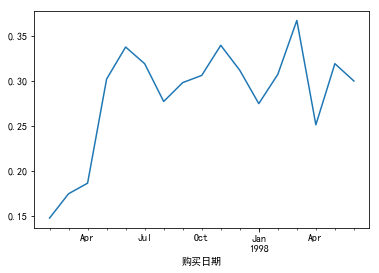

In [272]:
((df22.T.count())/(((df21>0).astype(int).T.replace(0,np.nan)).T.count().shift(1))).dropna().plot()
#回购率爬升到约30%后稳定
#但结合各用户——第一次购买时间分析中的发现的，自1997-03-25之后就没有新增用户了
#因此回购率稳定在30%，意味着活跃用户总群体在不断减少

## （十）用户分层（活跃用户和回流用户比率）

* 用户分层的RFM模型不了解，需进一步学习该模型的理论  
以下代码参考 https://www.jianshu.com/p/3233a513d9da 7.1

In [286]:
rfm = data.pivot_table(index = '用户ID',
                     values = ['订单金额','购买日期','订单数'],
                     aggfunc = {'订单金额':'sum',
                                '购买日期':'max',
                                '订单数':'sum'})

In [274]:
rfm

,订单数,订单金额,购买日期
用户ID,,,
1,1,11.77,19970101
2,6,89.00,19970112
3,16,156.46,19980528
4,7,100.50,19971212
5,29,385.61,19980103
6,1,20.99,19970101
7,18,264.67,19980322
8,18,197.66,19980329
9,6,95.85,19980608


In [278]:
rfm.购买日期=pd.to_datetime(rfm.购买日期,format='%Y%m%d')

In [279]:
# 日期的最大值与当前日期的差值为R
rfm['R'] = (rfm['购买日期'].max() - rfm['购买日期']) / np.timedelta64(1,'D')
rfm.rename(columns = {'订单金额':'M',
                     '订单数':'F'},
          inplace=True)

In [280]:
rfm

,F,M,购买日期,R
用户ID,,,,
1,1,11.77,1997-01-01,545.0
2,6,89.00,1997-01-12,534.0
3,16,156.46,1998-05-28,33.0
4,7,100.50,1997-12-12,200.0
5,29,385.61,1998-01-03,178.0
6,1,20.99,1997-01-01,545.0
7,18,264.67,1998-03-22,100.0
8,18,197.66,1998-03-29,93.0
9,6,95.85,1998-06-08,22.0


In [281]:
# 构建rfm模型公式
def get_rfm(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    
    result = d[label]
    return result

In [283]:
rfm['label'] = rfm[['R','F','M']].apply(lambda x:(x-x.mean()) / x.std()).apply(get_rfm,axis=1)

In [284]:
rfm

,F,M,购买日期,R,label
用户ID,,,,,
1,1,11.77,1997-01-01,545.0,一般挽留客户
2,6,89.00,1997-01-12,534.0,一般挽留客户
3,16,156.46,1998-05-28,33.0,重要保持客户
4,7,100.50,1997-12-12,200.0,一般发展客户
5,29,385.61,1998-01-03,178.0,重要保持客户
6,1,20.99,1997-01-01,545.0,一般挽留客户
7,18,264.67,1998-03-22,100.0,重要保持客户
8,18,197.66,1998-03-29,93.0,重要保持客户
9,6,95.85,1998-06-08,22.0,一般发展客户


In [285]:
rfm.groupby('label').sum()


,F,M,R
label,,,
一般价值客户,650,7181.28,36295.0
一般保持客户,1712,19937.45,29448.0
一般发展客户,13977,196971.23,591108.0
一般挽留客户,29346,438291.81,6951815.0
重要价值客户,11121,167080.83,358363.0
重要保持客户,107789,1592039.62,517267.0
重要发展客户,2023,45785.01,56636.0
重要挽留客户,1263,33028.40,114482.0


*　活跃用户定义为在在某一个时间窗口内有过消费的用户　　  

*　回流用户是指上一个窗口中没有消费，而在当前时间窗口内有过消费

In [297]:
df=data.copy()

In [298]:
df

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76
5,3,19970402,2,19.54
6,3,19971115,5,57.45
7,3,19971125,4,20.96
8,3,19980528,1,16.99
9,4,19970101,2,29.33


In [299]:
# 将购买日期列进行数据类型转换
df['购买日期'] = pd.to_datetime(df.购买日期,format = '%Y%m%d') #Y四位数的日期部分，y表示两位数的日期部分

In [300]:
df['月份'] = df.购买日期.values.astype('datetime64[M]') 

In [301]:
df

,用户ID,购买日期,订单数,订单金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01
5,3,1997-04-02,2,19.54,1997-04-01
6,3,1997-11-15,5,57.45,1997-11-01
7,3,1997-11-25,4,20.96,1997-11-01
8,3,1998-05-28,1,16.99,1998-05-01
9,4,1997-01-01,2,29.33,1997-01-01


In [302]:
#将用户消费数据进行数据透视：
#用户活跃程度分层
#将用户消费数据进行数据透视：
df1 = df.pivot_table(index = "用户ID",
                     columns = "月份",
                     values = '购买日期',
                     aggfunc = 'count').fillna(0)
df1.head() 

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [305]:
df2 = df1.applymap(lambda x:1 if x>0 else 0)
df2.tail()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [306]:
def active_status(data):
    status=[]
    for i in range(18): #共18个月
        
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:#前面某月消费过，是老客
                if status[i-1]=='unreg':#前一个月不是首次消费，不是新客
                    status.append('unreg')#则本月也不是新客
                else:
                    status.append('unactive')#前一个月是首次消费，属于新客，则本月为不活跃用户
            else:
                status.append('unreg')#前面某月没有消费过，则本月也不是新客
         #若本月消费
        else:
            if len(status)==0:#前面没有消费过
                status.append('new')#则为新客
            else:#前面消费过
                if status[i-1] =='unactive':#前一个月没有消费，是不活跃用户
                    status.append('return')#本月为回流用户
                elif status[i-1]=='unreg':#前一个月没有消费，不是新客
                    status.append('new')
                else:#前一个月是首次消费
                    status.append('active')#本月为活跃用户
                    
    return status

In [307]:
#可得到一张不同用户在不同月份的不同状态（new=新、active=活跃、return=回流、unactive=流失）,unreg相当于未注册，指这个用户在这个月及以前从未购买过产品，主要为了统计起来更加方便而加进去。
indexs=df['月份'].sort_values().astype('str').unique()
df3=df2.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
df3.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [308]:
#把unreg替换成NaN，再用fillna(0)把空值填为0。然后转置，把月份作为索引行，状态作为列，得到如下的表
df4=df3.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T
df4

,active,new,return,unactive
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0
1997-10-01,532.0,0.0,1307.0,21731.0


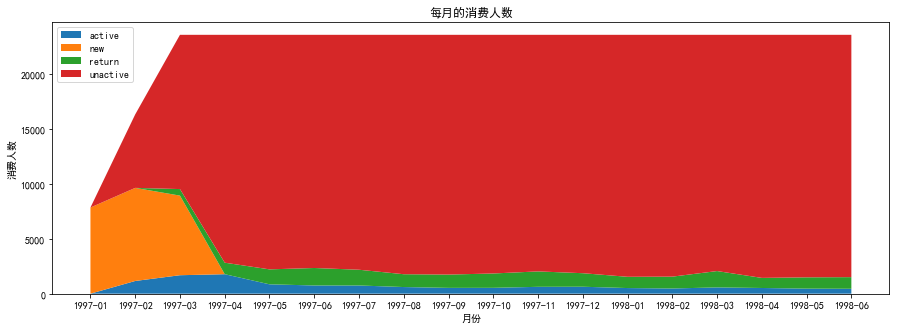

In [309]:
#作出非堆积效果图：
u =df4.reset_index()
labels = u[['active','new','return','unactive']].columns
plt.figure(figsize=(15,5))
plt.stackplot(u['index'].astype(str).apply(lambda x:x[:-3]), u['active'],u['new'],u['return'],u['unactive'], labels=labels)
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月的消费人数')
plt.legend(loc = 'upper left');

In [310]:
df5=df4.apply(lambda x:x/x.sum(),axis=1)#每一层用户占总用户的比例
df5

,active,new,return,unactive
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220
1997-10-01,0.022571,0.000000,0.055452,0.921977
